## Subclustering of neurons

In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(ggh4x)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
neu_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/neu_pool_in.rds")

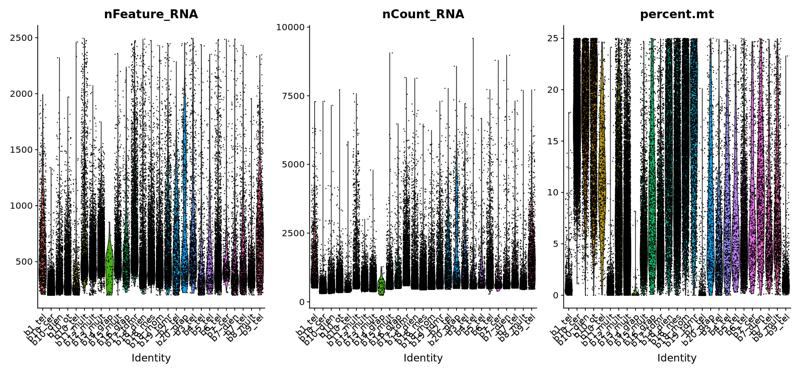

In [3]:
options(repr.plot.width=15, repr.plot.height=7)

qc_plot_rg <- VlnPlot(object = neu_pool, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.05, group.by = "orig.ident")
qc_plot_rg

### Clustering with regression of technical covariates (without orig.ident)

In [4]:
neu_pool <- NormalizeData(object = neu_pool, normalization.method = "LogNormalize", scale.factor = 1e4)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 603 rows containing missing values (geom_point).”


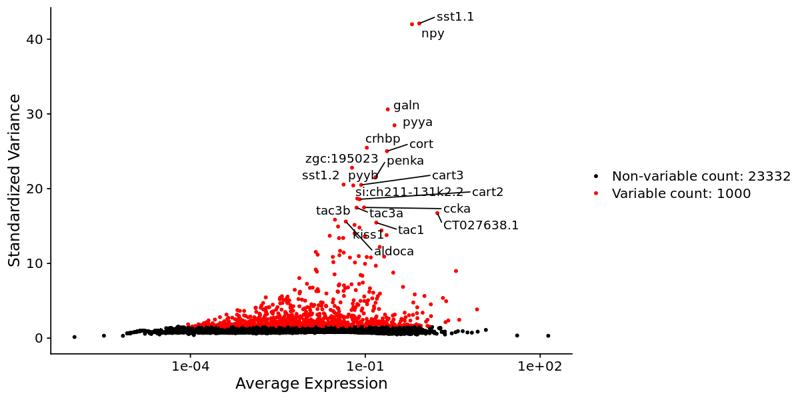

In [5]:
options(repr.plot.width=10, repr.plot.height=5)

neu_pool <- FindVariableFeatures(object = neu_pool, selection.method = 'vst', nfeatures = 1000)

#plot variable features with top vargenes labeled
top20 <- head(x = VariableFeatures(object = neu_pool), 20)
plot_var_feat <- LabelPoints(plot = VariableFeaturePlot(object = neu_pool), points = top20, repel = TRUE)
plot_var_feat

In [ ]:
all.genes <- rownames(x = neu_pool)
neu_pool <- ScaleData(object = neu_pool, features = all.genes, vars.to.regress = c("nFeature_RNA","nCount_RNA","percent.mt"))

Regressing out nFeature_RNA, nCount_RNA, percent.mt

Centering and scaling data matrix



In [9]:
str(neu_pool)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:36884288] 4 9 13 19 22 26 28 40 41 48 ...
  .. .. .. .. .. ..@ p       : int [1:64583] 0 1522 2560 2790 3442 4470 5836 6800 7150 7735 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 24332 64582
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:24332] "mansc1" "dusp16" "crebl2" "gpr19" ...
  .. .. .. .. .. .. ..$ : chr [1:64582] "B1.T_AAAGAGACGGATTC-1" "B1.T_AAAGAGACTAGACC-1" "B1.T_AAAGAGACTCTACT-1" "B1.T_AAAGGCCTAGATCC-1" ...
  .. .. .. .. .. ..@ x       : num [1:36884288] 0.99 0.974 4.775 0.988 0.986 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:36884288] 4 9 13 19 2

In [ ]:
neu_pool <- RunPCA(object = neu_pool)

ElbowPlot(object = neu_pool, ndims = 50)

In [ ]:
neu_pool <- FindNeighbors(neu_pool, dims = 1:28, verbose = FALSE)
neu_pool <- FindClusters(neu_pool, resolution = 0.6, verbose = FALSE)

neu_pool <- RunUMAP(neu_pool, dims = 1:28, verbose = FALSE)


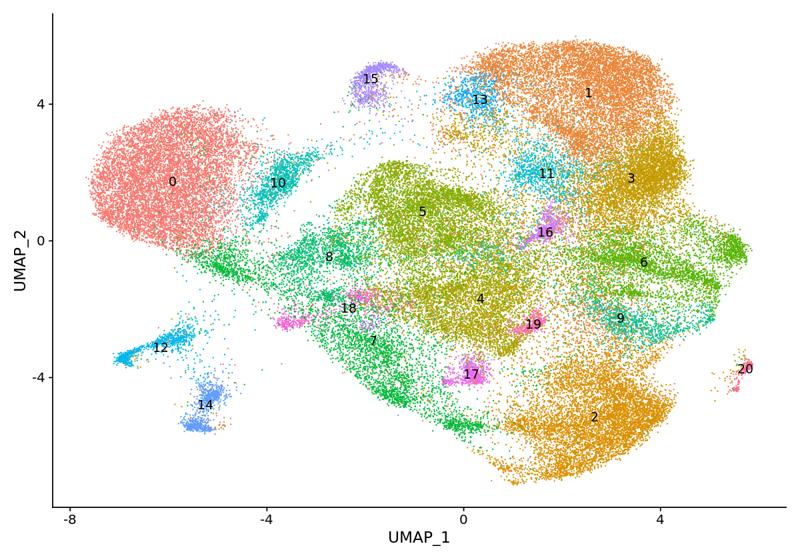

In [10]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, label = TRUE) + NoLegend()

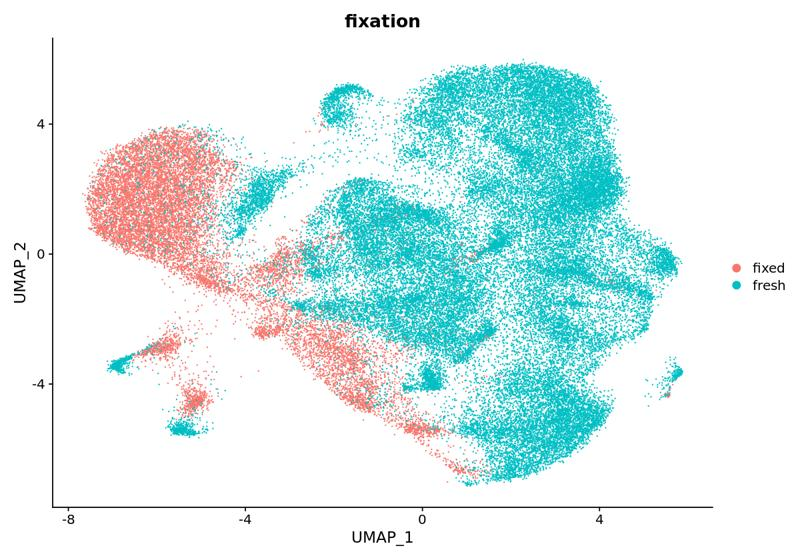

In [11]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "fixation")

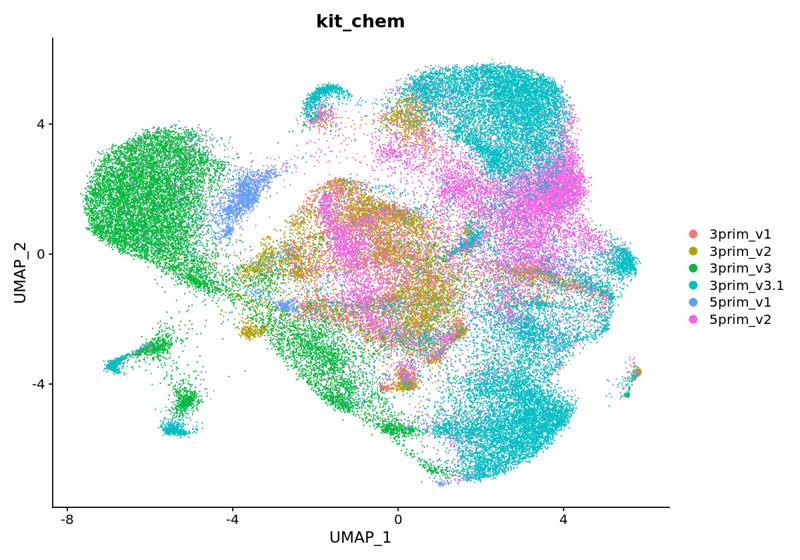

In [12]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "kit_chem")

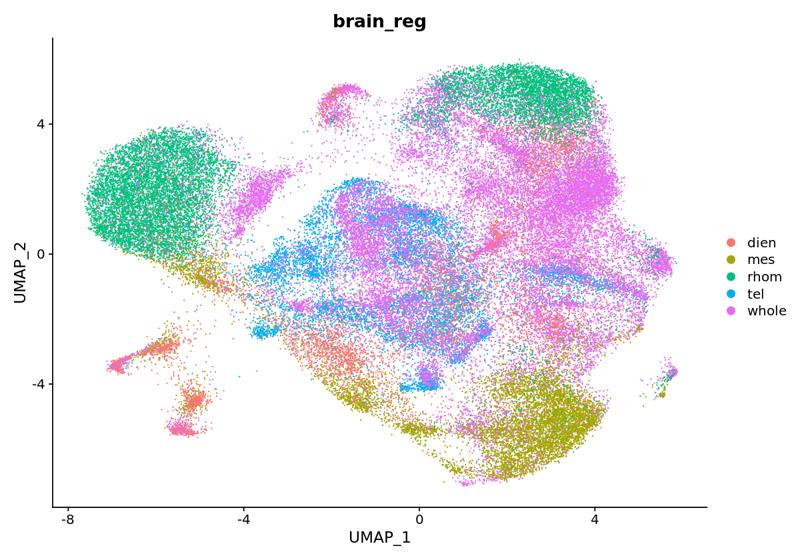

In [13]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "brain_reg")

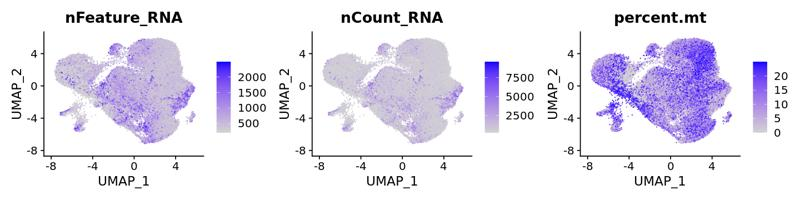

In [14]:
options(repr.plot.width=12, repr.plot.height=3)

FeaturePlot(neu_pool, features = c("nFeature_RNA","nCount_RNA","percent.mt"), ncol = 3, raster = FALSE)

### Clustering with regression of all covariates (including orig.ident)

In [20]:
neu_pool_2 <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/neu_pool_in.rds")

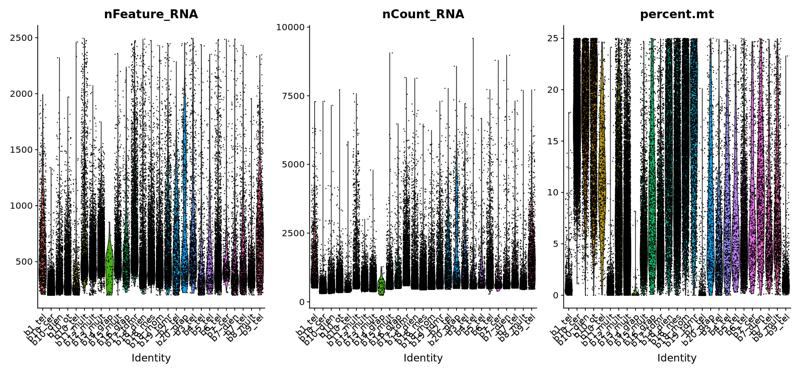

In [21]:
options(repr.plot.width=15, repr.plot.height=7)

qc_plot_rg <- VlnPlot(object = neu_pool_2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size = 0.05, group.by = "orig.ident")
qc_plot_rg

In [22]:
neu_pool_2 <- NormalizeData(object = neu_pool_2, normalization.method = "LogNormalize", scale.factor = 1e4)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 603 rows containing missing values (geom_point).”


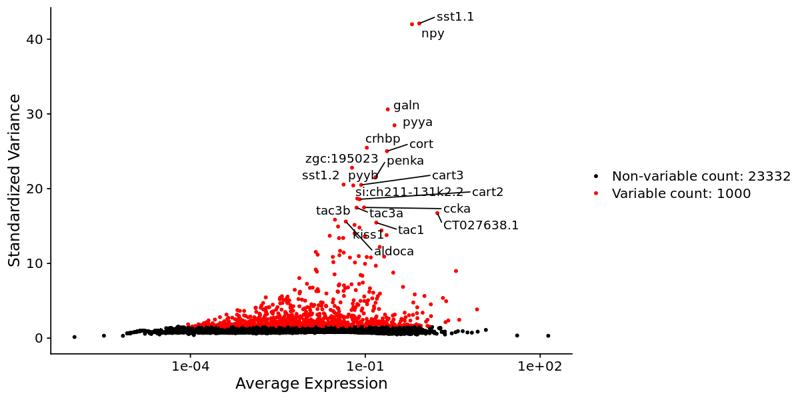

In [23]:
options(repr.plot.width=10, repr.plot.height=5)

neu_pool_2 <- FindVariableFeatures(object = neu_pool_2, selection.method = 'vst', nfeatures = 1000)

#plot variable features with top vargenes labeled
top20 <- head(x = VariableFeatures(object = neu_pool_2), 20)
plot_var_feat <- LabelPoints(plot = VariableFeaturePlot(object = neu_pool_2), points = top20, repel = TRUE)
plot_var_feat

In [ ]:
all.genes <- rownames(x = neu_pool_2)
neu_pool_2 <- ScaleData(object = neu_pool_2, features = all.genes, vars.to.regress = c("nFeature_RNA","nCount_RNA","percent.mt", "orig.ident"))

Regressing out nFeature_RNA, nCount_RNA, percent.mt, orig.ident



PC_ 1 
Positive:  ppp1r14ab, LO018550.1, si:dkeyp-72h1.1, kiss1, GNG14, pou4f1, nwd2, nr4a2a, gpr78b, si:ch1073-90m23.1 
	   pnoca, plekhg5b, gng8, irx1b, prkcq, csrp2, prox1a, rgs8, sst6, mmel1 
	   aoc1, msi2b, tac3a, tgfbi, ccl44, cpne4b, pou4f2, CABZ01112647.1, synpr, rgma 
Negative:  tmsb, tubb5, gap43, cnp, FO704736.1, CR318588.4, rplp2l, rps12, fabp7a, rps8a 
	   rplp1, rpl37.1, rpl6, rps6, cd99l2, sox11a, tuba1a, rpl3, sox11b, eef1g 
	   rps2, uba52, si:ch211-288g17.3, lima1a, si:ch211-222l21.1, rpl9, epd, insm1a, apoc1, rps18 
PC_ 2 
Positive:  tubb5, tmsb, si:dkey-56m19.5, cnp, cd99l2, FO704736.1, rps8a, lima1a, eef1g, rplp1 
	   rps12, hmgb2b, rps2, rpl37.1, rplp2l, si:ch211-288g17.3, rps6, tuba1a, si:ch73-1a9.3, eef1a1l1 
	   rpl9, rpl3, rpl6, hmgn2, vim, rps18, uba52, insm1a, elavl3, si:ch211-222l21.1 
Negative:  scg2b, zgc:122979, rtn4rl2a, atp1b1b, atp1a3b, hrh3, rtn4rl2b, zgc:114118, itm2cb, fosb 
	   adgrb1b, vgf, egr2a, egr4, egr3, atp2a3, nrgna, bdnf, arl5c, ccdc136b

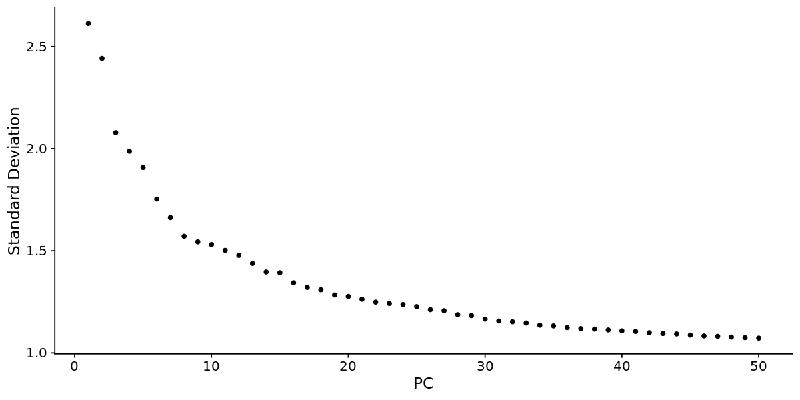

In [25]:
neu_pool_2 <- RunPCA(object = neu_pool_2)

ElbowPlot(object = neu_pool_2, ndims = 50)

In [26]:
neu_pool_2 <- FindNeighbors(neu_pool_2, dims = 1:28, verbose = FALSE)
neu_pool_2 <- FindClusters(neu_pool_2, resolution = 0.6, verbose = FALSE)

neu_pool_2 <- RunUMAP(neu_pool_2, dims = 1:28, verbose = FALSE)


ERROR: Error in FindNeighbors(neu_pool_2, dims = 1:30, verbose = FALSE): object 'neu_pool_2' not found


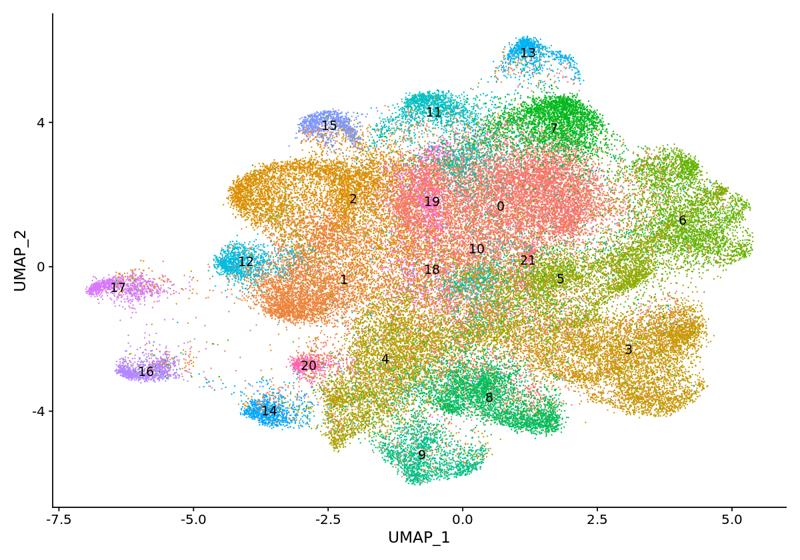

In [27]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool_2, label = TRUE) + NoLegend()

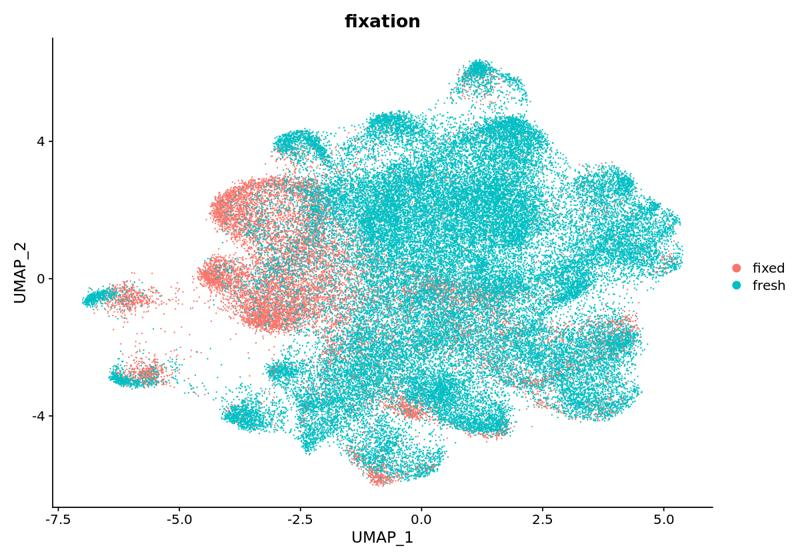

In [28]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool_2, group.by = "fixation")

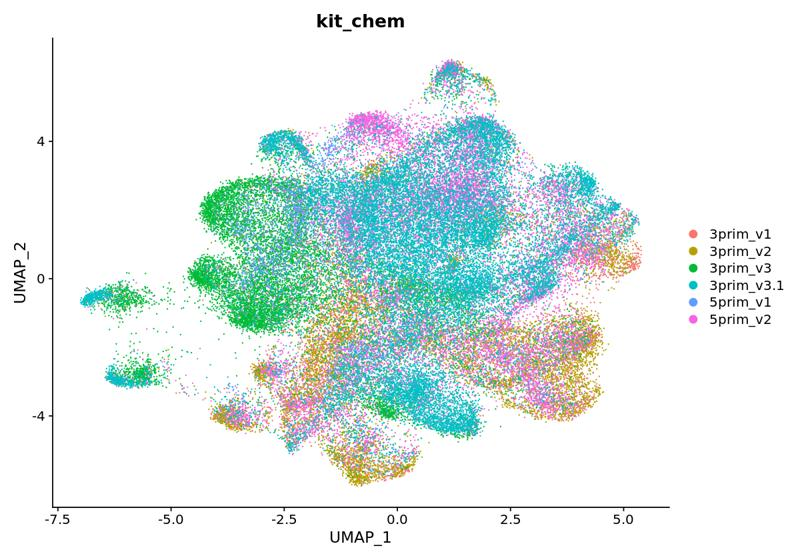

In [29]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool_2, group.by = "kit_chem")

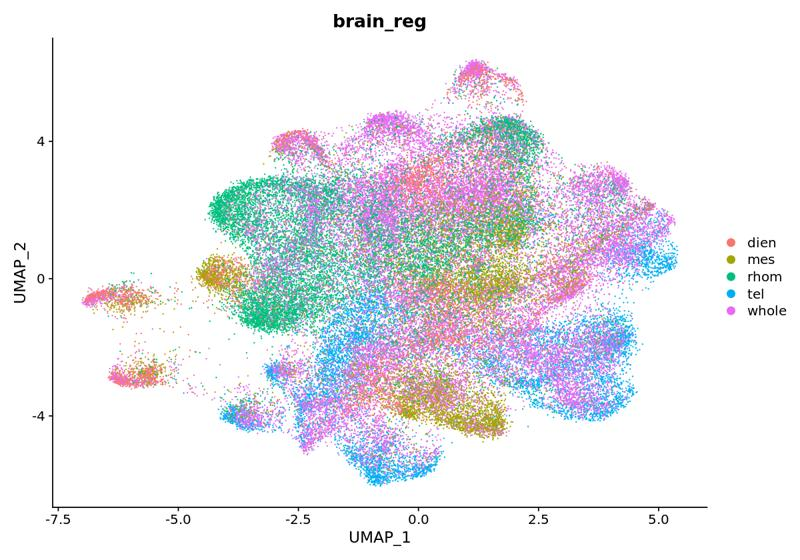

In [30]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool_2, group.by = "brain_reg")

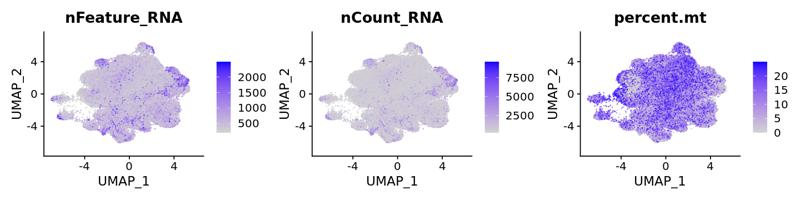

In [31]:
options(repr.plot.width=12, repr.plot.height=3)

FeaturePlot(neu_pool_2, features = c("nFeature_RNA","nCount_RNA","percent.mt"), ncol = 3, raster = FALSE)

In [32]:
# save this embedding for future annotation
saveRDS(neu_pool_2, file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")

### Identify cluster-specific markers
Use the embedding with regression of all covariates.

#### Recluster with higher resolution - final
While inspecting marker genes I saw that some clusters were not appropriately split so I will recluster the object with regressed counts, but with higher resolution.

In [ ]:
#neu_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")

In [50]:
neu_pool <- FindNeighbors(neu_pool, dims = 1:30, verbose = FALSE)
neu_pool <- FindClusters(neu_pool, resolution = 0.8, verbose = FALSE)

neu_pool <- RunUMAP(neu_pool, dims = 1:30, verbose = FALSE)


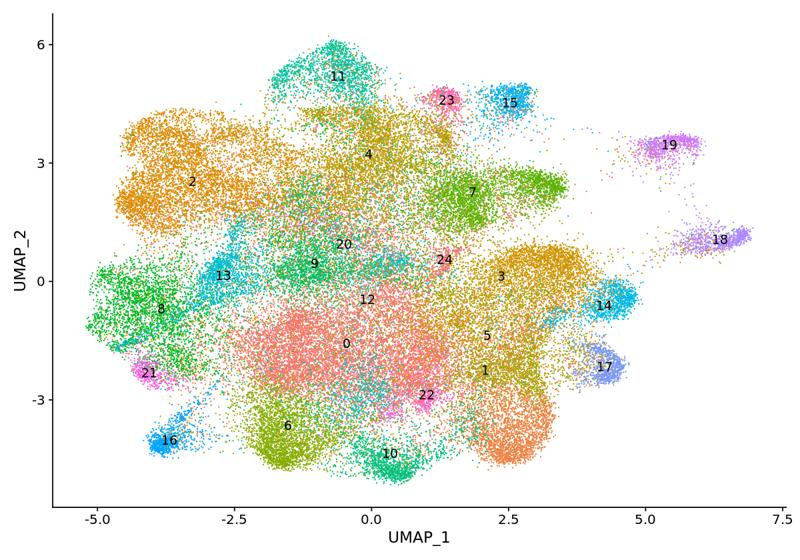

In [51]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, label = TRUE) + NoLegend()

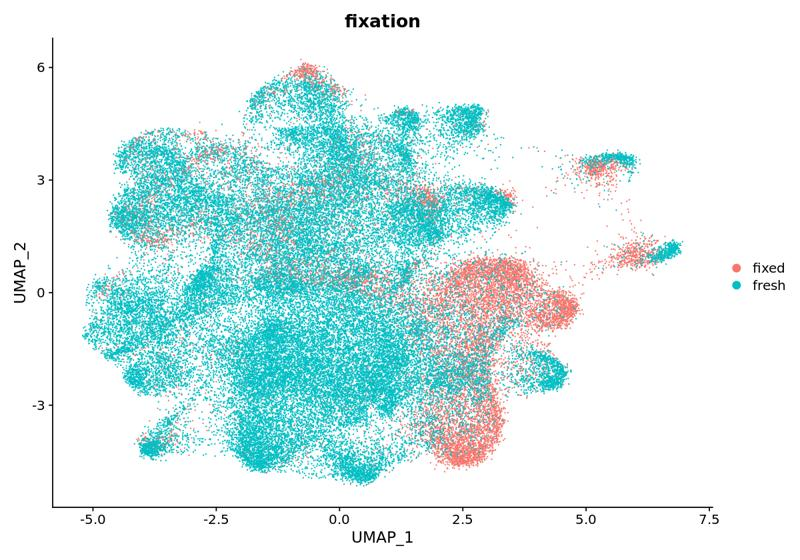

In [52]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "fixation")

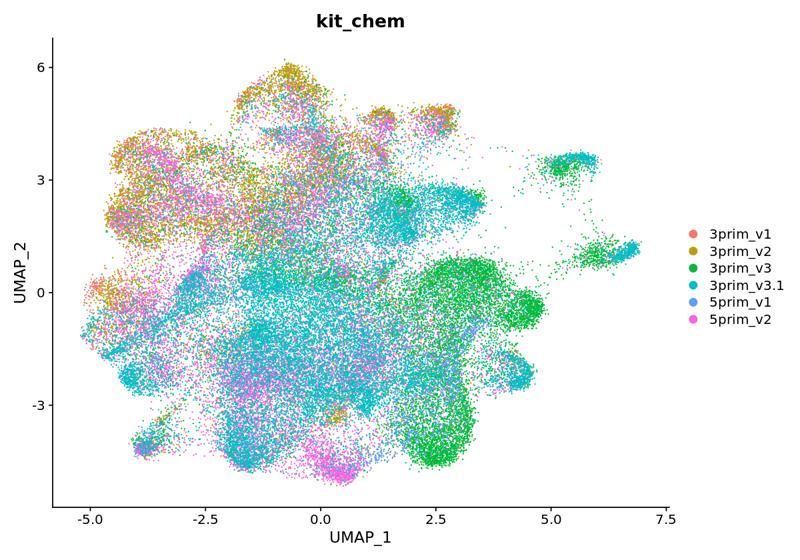

In [53]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "kit_chem")

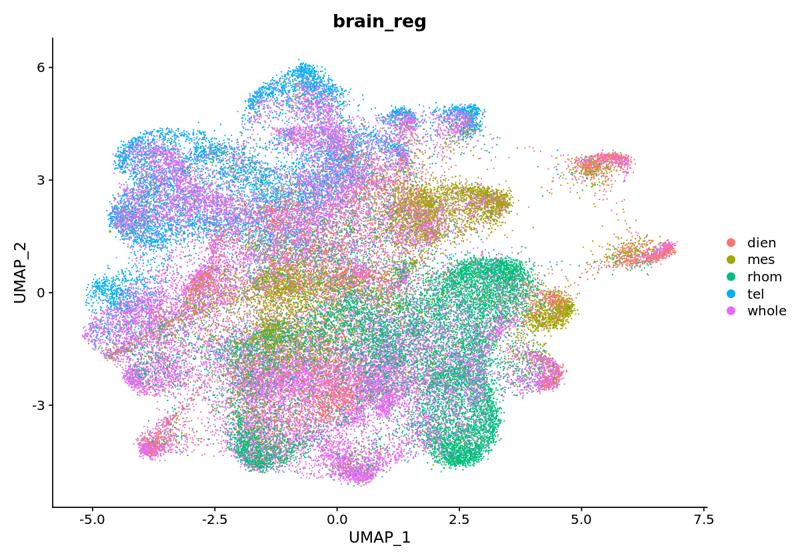

In [54]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(neu_pool, group.by = "brain_reg")

In [53]:
# save original numeric names as separate 
neu_pool$pc30_res0.8_clusters_numeric <- Idents(neu_pool)

#### Find and select useful markers

In [55]:
# find markers
neu_pool.mct.markers.bimod <- FindAllMarkers(object = neu_pool, only.pos = TRUE, min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")
neu_pool.mct.markers.bimod %>% group_by(cluster) %>% top_n(n = 2, wt = avg_log2FC)
write.csv(neu_pool.mct.markers.bimod, file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg_30pcs_res0-8_markers_bimod.csv")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17

Calculating cluster 18

Calculating cluster 19

Calculating cluster 20

Calculating cluster 21

Calculating cluster 22

Calculating cluster 23

Calculating cluster 24



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.000000e+00,1.717259,0.624,0.296,0.000000e+00,0,epd
0.000000e+00,1.466647,0.620,0.318,0.000000e+00,0,fabp7a
0.000000e+00,1.617816,0.878,0.777,0.000000e+00,1,hsp90aa1.2
2.508289e-307,1.474552,0.321,0.148,6.103169e-303,1,si:dkey-4p15.3
0.000000e+00,2.509884,0.669,0.161,0.000000e+00,2,nrgna
0.000000e+00,2.408559,0.711,0.205,0.000000e+00,2,adcyap1b
0.000000e+00,1.865067,0.386,0.145,0.000000e+00,3,si:dkey-4p15.3
0.000000e+00,1.836873,0.895,0.778,0.000000e+00,3,hsp90aa1.2
0.000000e+00,1.709192,0.256,0.026,0.000000e+00,4,dlx5a


Use FeaturePlots (below) to inspect all clusters, then record cluster-specific markers (unique ones if possible and those shared between subset of clusters). Based on this I will merge clusters that share a similar expression profile.

In [3]:
# record genes with specific spatial expression for each cluster (unique and shared with other clusters)
unique_markers <- list()
unique_markers[["cluster_0"]] <- c() #none, high background contamination with rg, ery markers
unique_markers[["cluster_1"]] <- c()
unique_markers[["cluster_2"]] <- c("c1ql3b.1", "efna1b", "hrh3", "ets2")
unique_markers[["cluster_3"]] <- c()
unique_markers[["cluster_4"]] <- c("dlx5a") #some also in 23
unique_markers[["cluster_5"]] <- c("tcima", "egr4", "egr1")
unique_markers[["cluster_6"]] <- c("mbpb", "stxbp6l") #high OGD contamination...
unique_markers[["cluster_7"]] <- c("pax7a", "hivep1")
unique_markers[["cluster_8"]] <- c()
unique_markers[["cluster_9"]] <- c("lhx9")
unique_markers[["cluster_10"]] <- c("FO704772.1", "BX548011.2")
unique_markers[["cluster_11"]] <- c("six3b", "six3a", "arl5c")
unique_markers[["cluster_12"]] <- c() #none, can be merged into 0? inspect 1 on 1
unique_markers[["cluster_13"]] <- c("bnc2", "alcamb", "ebf3a.1")
unique_markers[["cluster_14"]] <- c()
unique_markers[["cluster_15"]] <- c("cort", "chodl")
unique_markers[["cluster_16"]] <- c("chgb", "prdx1", "txn", "scgn")
unique_markers[["cluster_17"]] <- c("uts1", "scrt1b", "CABZ01072077.1", "tjp1a")
unique_markers[["cluster_18"]] <- c("kiss1", "GNG14", "prkcq")
unique_markers[["cluster_19"]] <- c("nwd2", "tac3a", "gng8", "g0s2")
unique_markers[["cluster_20"]] <- c()
unique_markers[["cluster_21"]] <- c("oprd1b", "insm1a", "gse1", "pax6b")
unique_markers[["cluster_22"]] <- c()
unique_markers[["cluster_23"]] <- c("sst1.1", "npy", "sox6", "lhx6")
unique_markers[["cluster_24"]] <- c("aldoca", "itpr1b", "myo18aa", "roraa") #possible contamination?


In [4]:
# shared across multiple
shared_markers <- list()
shared_markers[["cluster_0"]] <- c("fat2", "zic1", "neurod1", "qkia", "zbtb18", "olfm1a", "nebl", "hmgb2a", "dlg1")
shared_markers[["cluster_1"]] <- c("atp1b1b", "si:dkey-4p15.3", "pim1", "nebl", "fat2")
shared_markers[["cluster_2"]] <- c("nrgna", "adcyap1b", "nell2b", "bhlhe22", "rtn4rl2a", "chga", "slc17a6a", "eomesa")
shared_markers[["cluster_3"]] <- c( "si:dkey-4p15.3", "grm1b", "chordc1a", "atp1b1b")
shared_markers[["cluster_4"]] <- c("gad2", "gad1b", "scg2b", "slc32a1", "slc6a1b")
shared_markers[["cluster_5"]] <- c("atp1b1b", "pim1")
shared_markers[["cluster_6"]] <- c("fat2", "zic1", "neurod1", "ggctb", "qkia", "olfm1a")
shared_markers[["cluster_7"]] <- c("gad2", "gad1b", "slc32a1", "slc6a1b")
shared_markers[["cluster_8"]] <- c("tubb5", "cnp", "tuba1a", "tmsb", "bcam", "sox4a.1")
shared_markers[["cluster_9"]] <- c("adcyap1b", "slc17a6a", "zfhx3", "zfhx4", "slc17a6b")
shared_markers[["cluster_10"]] <- c("zic1", "dlg1", "neurod1")
shared_markers[["cluster_11"]] <- c("rtn4rl2b", "penkb", "rtn4rl2a", "nrgna", "slc32a1")
shared_markers[["cluster_12"]] <- c() # very unspecific signature
shared_markers[["cluster_13"]] <- c("tubb5", "zfhx3", "zfhx4", "cnp")
shared_markers[["cluster_14"]] <- c( "si:dkey-4p15.3", "grm1b","atf3", "dusp5")
shared_markers[["cluster_15"]] <- c("synpr", "syt10", "dlx5a", "slc32a1", "gad2", "gad1b")
shared_markers[["cluster_16"]] <- c("msi2b")
shared_markers[["cluster_17"]] <- c("slc17a6b", "zic2a", "egr1")
shared_markers[["cluster_18"]] <- c("LO018550.1", "ppp1r14ab", "si:dkeyp-72h1.1", "msi2b")
shared_markers[["cluster_19"]] <- c("si:dkeyp-72h1.1", "msi2b")
shared_markers[["cluster_20"]] <- c("zbtb18", "qkia")
shared_markers[["cluster_21"]] <- c("bcam", "tmsb", "cnp", "hmgb2b", "tubb5")
shared_markers[["cluster_22"]] <- c("neurod1", "vsnl1a", "rbfox3a", "nebl", "olfm1a", "zic1", "etv1")
shared_markers[["cluster_23"]] <- c("vgf", "si:dkey-175g6.2", "slc6a1b", "slc23a1", "gad1b")
shared_markers[["cluster_24"]] <- c()

In [125]:
# get genes from single cluster in desc fold change order
genes.single.cluster.bimod <- function(x, markerlist){
  genes.only <- markerlist %>% filter (cluster ==x ) %>% arrange(desc(avg_log2FC)) %>% select(gene)
}

# get genes for each cluster 
for (cluster in levels(neu_pool@active.ident)) {
  genelist.cluster <- genes.single.cluster.bimod(cluster, neu_pool.mct.markers.bimod)
  genelist.cluster <- genelist.cluster$gene
  topgenes <- head(genelist.cluster, 40)
  assign(paste0("cluster_",cluster, "_top40"), topgenes)
}

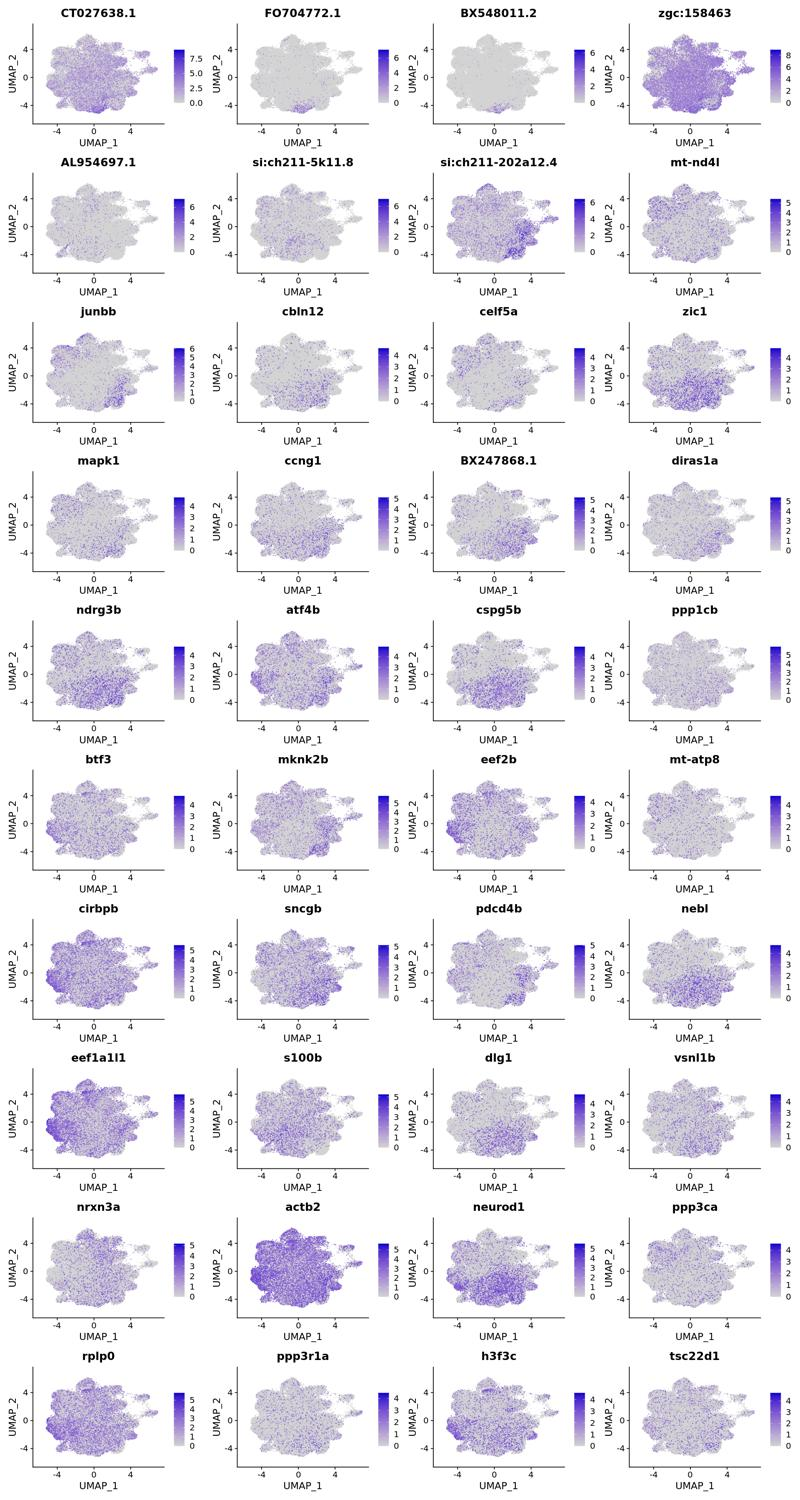

In [107]:
options(repr.plot.width=16, repr.plot.height=30)

FeaturePlot(object = neu_pool, reduction = 'umap', features = `cluster_10_top40`, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

Use DotPlot to validate and if necessary refine marker selection.

In [5]:
unique_markers_vector <- unlist(unique_markers)
unique_markers_vector <- unname(unique_markers_vector)
unique_markers_vector

[1] "c1ql3b.1"       "efna1b"         "hrh3"           "ets2"          
 [5] "dlx5a"          "tcima"          "egr4"           "egr1"          
 [9] "mbpb"           "stxbp6l"        "pax7a"          "hivep1"        
[13] "lhx9"           "FO704772.1"     "BX548011.2"     "six3b"         
[17] "six3a"          "arl5c"          "bnc2"           "alcamb"        
[21] "ebf3a.1"        "cort"           "chodl"          "chgb"          
[25] "prdx1"          "txn"            "scgn"           "uts1"          
[29] "scrt1b"         "CABZ01072077.1" "tjp1a"          "kiss1"         
[33] "GNG14"          "prkcq"          "nwd2"           "tac3a"         
[37] "gng8"           "g0s2"           "oprd1b"         "insm1a"        
[41] "gse1"           "pax6b"          "sst1.1"         "npy"           
[45] "sox6"           "lhx6"           "aldoca"         "itpr1b"        
[49] "myo18aa"        "roraa"

In [6]:
shared_markers_vector <- unlist(shared_markers)
shared_markers_vector <- unname(shared_markers_vector)
#remove duplicates
shared_markers_vector <- unique(shared_markers_vector)
shared_markers_vector

[1] "fat2"            "zic1"            "neurod1"         "qkia"           
 [5] "zbtb18"          "olfm1a"          "nebl"            "hmgb2a"         
 [9] "dlg1"            "atp1b1b"         "si:dkey-4p15.3"  "pim1"           
[13] "nrgna"           "adcyap1b"        "nell2b"          "bhlhe22"        
[17] "rtn4rl2a"        "chga"            "slc17a6a"        "eomesa"         
[21] "grm1b"           "chordc1a"        "gad2"            "gad1b"          
[25] "scg2b"           "slc32a1"         "slc6a1b"         "ggctb"          
[29] "tubb5"           "cnp"             "tuba1a"          "tmsb"           
[33] "bcam"            "sox4a.1"         "zfhx3"           "zfhx4"          
[37] "slc17a6b"        "rtn4rl2b"        "penkb"           "atf3"           
[41] "dusp5"           "synpr"           "syt10"           "dlx5a"          
[45] "msi2b"           "zic2a"           "egr1"            "LO018550.1"     
[49] "ppp1r14ab"       "si:dkeyp-72h1.1" "hmgb2b"          "vsnl1a"         
[53] "rbfox3a"         "etv1"            "vgf"             "si:dkey-175g6.2"
[57] "slc23a1"

In [7]:
# plot together
all_markers_vector <- c(unique_markers_vector, shared_markers_vector)
all_markers_vector <- unique(all_markers_vector)

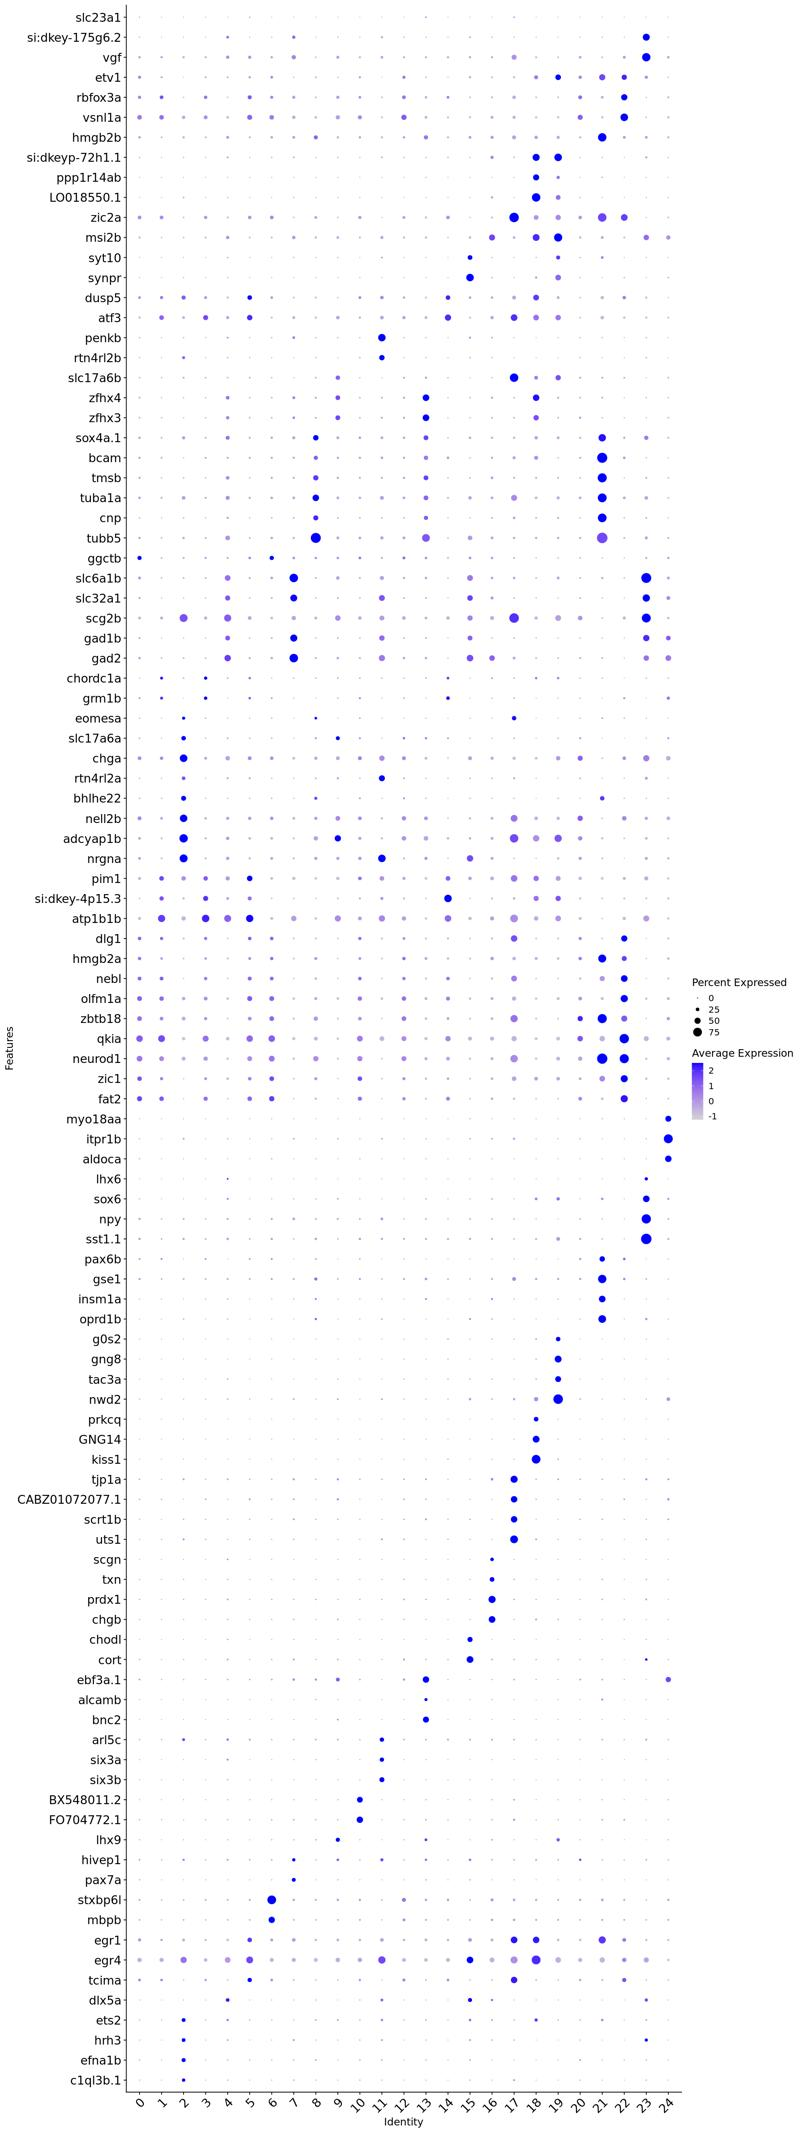

In [166]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all <- DotPlot(neu_pool, features = all_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_all + coord_flip()

In [ ]:
options(repr.plot.width=20, repr.plot.height=15)

dotplot_unique <- DotPlot(neu_pool, features = unique_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_unique

In [ ]:
options(repr.plot.width=15, repr.plot.height=20)

#dotplot_shared <- DotPlot(neu_pool, features = shared_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_shared + coord_flip()

#### Plot markers from Raj 2020

A complementary approach to identifying markers in a dataset-driven way would be to check for expression of known marker genes. The Raj 2020 paper (Emergence of neuronal diversity) has a scRNAseq dataset of zebrafish development with last timepoint at 15 dpf. I plot the markers from the paper here to further clarify my cluster IDs.  

In [3]:
# based on Fig3A - transcription factors
raj_2020_neu1 <- c("eomesa", "tbr1b", "dlx2a", "dlx5a", "otpa", "nkx2.4a", "nkx2.1", "fezf1", "six6b", "six3b",
                      "pitx2", "neurod6a", "neurod6b", "irx1a", "tal1", "sox14", "pax7b", "sox1a", "gata3", "foxb1a",
                      "tcf7l2", "barhl2", "lhx9", "barhl1a", "pax2a", "cebpa", "onecut1", "shox2", "pou3f1", "eng1b",
                      "neurod2", "pou4f2", "otx1b", "pou4f1", "isl1", "phox2bb", "zic5", "zic2a", "pax6a", "pax6b",
                       "tlx3b", "hoxb5a", "skor1b")
# based on Fig3B + C
raj_2020_neu2 <- c("adcyap1a", "adcyap1b", "bdnf", "penkb", "kiss1", "pnoca", "galn", "pdyn", "sst1.1", "sst3",
                  "sst6", "tac1", "cart2", "vgf", "npy", "pyyb", # neuropeptides
                   "adcyap1r1a", "oprd1b", # receptors
                  "gad1b", "gad2", # neurotransmitters
                   "slc6a1a", "slc6a1b", "slc32a1", "slc17a6a", "slc17a6b", "slc5a7a", # transporters
                  "gria1a", "gria2b", "grin1b", "gabrb2", # receptors
                   "cacng2a", "cacng2b", "cacng8a", "kcnf1b", "kcnd3", # channels
                   "gsg1l"
                  )

In [ ]:
options(repr.plot.width=20, repr.plot.height=15)

dotplot_raj_1 <- DotPlot(neu_pool, features = raj_2020_neu1) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_raj_1

In [ ]:
options(repr.plot.width=20, repr.plot.height=15)

dotplot_raj_2 <- DotPlot(neu_pool, features = raj_2020_neu2) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_raj_2

In [4]:
#plot all markers together
raj_2020_neu <- c(raj_2020_neu1, raj_2020_neu2)

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: eng1b, otx1b, sst3, cacng2b”


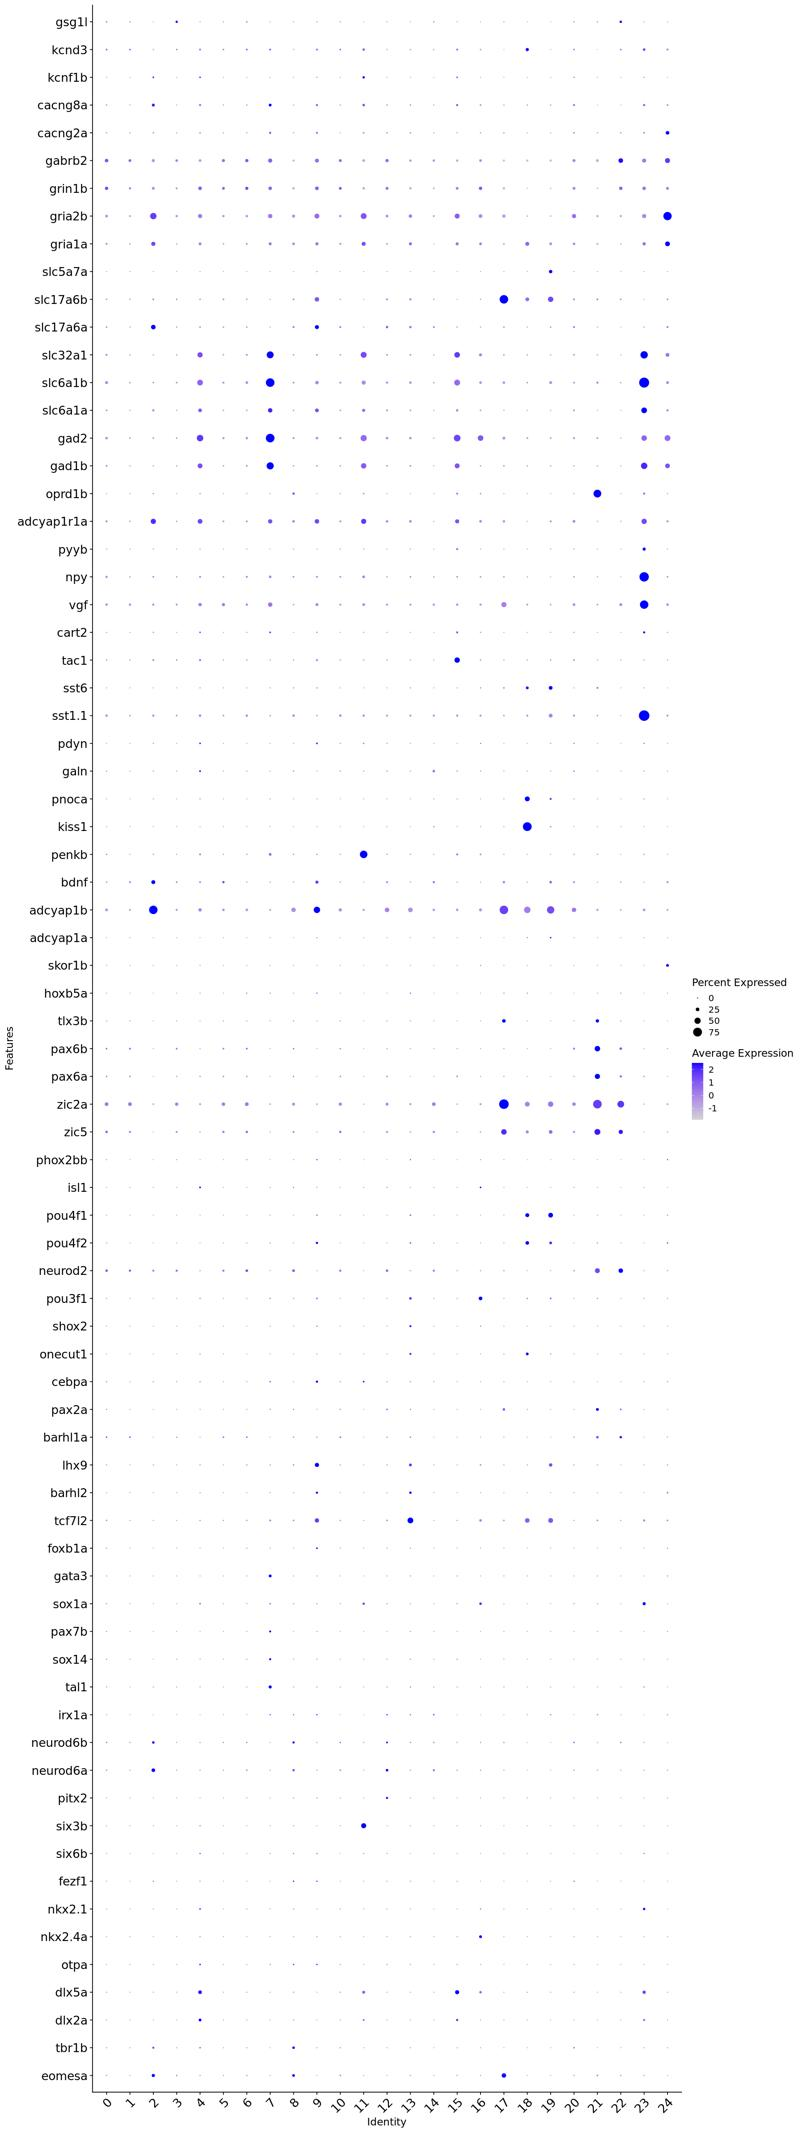

In [193]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all_raj <- DotPlot(neu_pool, features = raj_2020_neu) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_all_raj + coord_flip()

#### Inspect similar clusters for possible difference in markers
It's possible that clusters that appear very similar by markers in the all-vs-all comparison have some subtle difference when compared one-on-one. This is particularly true for small clusters that might appear at high resolution due to some technical artefact. I check for this here. In case valid markers are found, include in final annotation, otherwise merge clusters.  
The cases where no solid markers could be found:  
12 (compare with 0)  
22 (compare with 0)  
20 (compare with 9)  
14 (compare with 3)  

In [195]:
markers_12_vs_0 <- FindMarkers(neu_pool, ident.1 = 12, ident.2 = 0, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")

In [204]:
markers_12_vs_0$gene <- rownames(markers_12_vs_0)
top_markers_12_vs_0 <- markers_12_vs_0 %>% top_n(n = 20, wt = avg_log2FC) %>% select(gene)
top_markers_12_vs_0 <- as.vector(top_markers_12_vs_0$gene)

In [205]:
top_markers_12_vs_0

[1] "hsp70l"      "hsp70.1"     "pcp4a"       "hsp90aa1.2"  "mbpa"       
 [6] "hsp70.3"     "stxbp6l"     "hsp70.2"     "NC-002333.4" "dnajb1b"    
[11] "atp1b1b"     "adcyap1b"    "DNAJA4"      "hspb1"       "flj13639"   
[16] "ywhag1"      "CR383676.2"  "nrn1a"       "BX936284.1"  "atf3"

Most are heat-shock or stress related + none are very specific in FeaturePlot - conclusion: merge 12 with 0.

In [196]:
markers_22_vs_0 <- FindMarkers(neu_pool, ident.1 = 22, ident.2 = 0, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")

In [207]:
markers_22_vs_0$gene <- rownames(markers_22_vs_0)
top_markers_22_vs_0 <- markers_22_vs_0 %>% top_n(n = 20, wt = avg_log2FC) %>% select(gene)
top_markers_22_vs_0 <- as.vector(top_markers_22_vs_0$gene)

In [209]:
top_markers_22_vs_0

[1] "CT027638.1"      "si:ch73-62l21.1" "sypb"            "fez1"           
 [5] "tob1b"           "neurod1"         "vsnl1a"          "nptnb"          
 [9] "rbfox3a"         "syt2a"           "tob1a"           "egr4"           
[13] "c1qtnf4"         "bhlhe40"         "zic2a"           "nrn1a"          
[17] "syt12"           "olfm2b"          "zgc:122979"      "en1b"

While in this case many of the genes seem like genuine markers rather than stress-related, they don't show a very specific profile on the FeaturePlot. Additionally, this cluster is composed largely of 2 FACS libraries (having smallest fraction from dissected libraries of all clusters - see below) so it's highly likely that it's a result of technical batch effect rather than real biology. Merge with 0.

In [197]:
markers_20_vs_9 <- FindMarkers(neu_pool, ident.1 = 20, ident.2 = 9, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")

In [210]:
markers_20_vs_9$gene <- rownames(markers_20_vs_9)
top_markers_20_vs_9 <- markers_20_vs_9 %>% top_n(n = 20, wt = avg_log2FC) %>% select(gene)
top_markers_20_vs_9 <- as.vector(top_markers_20_vs_9$gene)

In [211]:
top_markers_20_vs_9

[1] "zbtb18"     "qkia"       "mt-nd3"     "fat2"       "mt-cyb"    
 [6] "snap25b"    "mt-nd4"     "neurod1"    "susd6"      "zic2a"     
[11] "etv1"       "vsnl1a"     "hmgb2a"     "dlg1"       "sec61g"    
[16] "ndrg3b"     "BX247868.1" "mtbl"       "cox8b"      "olfm1a"

In [ ]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = neu_pool, reduction = 'umap', features = top_markers_20_vs_9, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

While most of the genes are real and there is a pattern in some, after reinspecting DotPlots I'm not sure 9 is the right "parent" cluster for 20 - maybe 0 instead?  
For better visibility of position highlight cells of cluster 20 only in contrast to rest.  

In [215]:
cells_cl20 <- WhichCells(neu_pool, idents = 20)
head(cells_cl20)

[1] "B1.T_CACCGGGATCGCTC-1" "B1.T_CGATACGATGAAGA-1" "B1.T_TGCCAAGAACGGAG-1"
[4] "B2.T_ACCTATTGTGAGCT-1" "B2.T_ACGCCACTTGAGCT-1" "B2.T_ATCGGAACCAAGCT-1"

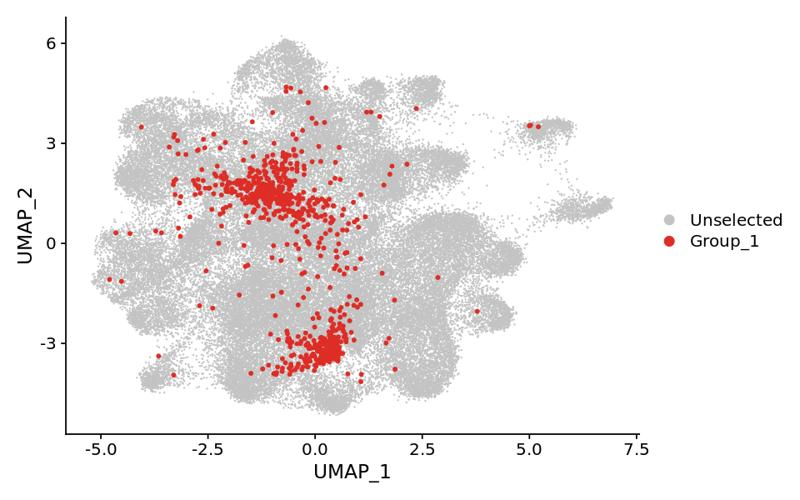

In [216]:
options(repr.plot.width=8, repr.plot.height=5)

DimPlot(neu_pool, cells.highlight = cells_cl20)

This really highlight the issue - cluster 20 is one of the few remaining clusters that have a strong split in the UMAP, which might indicate that I should have used a higher resolution for clustering.  
However, given that the annotation of other clusters is 90% done I don't want to go back and recluster at the moment. Save for optional one final round of revision & give this cluster a unique name.  

In [198]:
markers_14_vs_3 <- FindMarkers(neu_pool, ident.1 = 14, ident.2 = 3, 
  min.pct = 0.2, logfc.threshold = 0.2, test.use = "bimod")

In [218]:
markers_14_vs_3$gene <- rownames(markers_14_vs_3)
top_markers_14_vs_3 <- markers_14_vs_3 %>% top_n(n = 20, wt = avg_log2FC) %>% select(gene)
top_markers_14_vs_3 <- as.vector(top_markers_14_vs_3$gene)

In [219]:
top_markers_14_vs_3

[1] "cd74a"      "flj13639"   "plp1b"      "hpcal4"     "gadd45ga"  
 [6] "uchl1"      "phactr3b"   "dusp5"      "jdp2b"      "maptb"     
[11] "gadd45ba"   "CR318588.4" "apoc1"      "cd59"       "b2ml"      
[16] "luzp2"      "nr4a1"      "rab6ba"     "cited4b"    "zgc:92066"

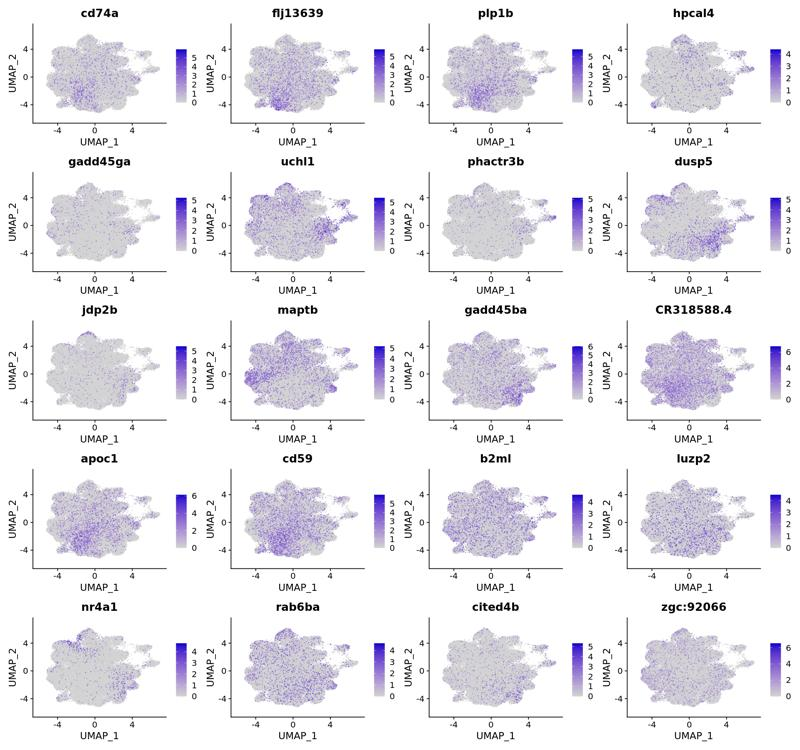

In [220]:
options(repr.plot.width=16, repr.plot.height=15)

FeaturePlot(object = neu_pool, reduction = 'umap', features = top_markers_14_vs_3, 
            ncol = 4, cols = c("lightgrey","mediumblue"),
           raster = FALSE)

None are sufficiently specific for cluster 14, however given that the library composition is heavily biased in favour of mes in this cluster (whereas 3 is unspecific) I'm hesitant whether merging makes sense. Otoh the main contributor is one of the fixed libaries which could indicate technical sources of variation.  
Keep separate for now, maybe revisit in optional final round.  

### QC: check fraction of orig.ident per cluster

Before I fully zoom in on regional specificity, I want to make sure that all the clusters have at least two libraries supporting them (ie no strong batch effect driving apparent "regional" specificity).  
As a minimal heuristic for now I look into whether any cluster is made >90% of a single library.  

In [142]:
orig.ident.by.cluster <- table(neu_pool$orig.ident, neu_pool$clusters_numeric_pc30_res0.8)

In [143]:
orig.ident.by.cluster

          
              0    1    2    3    4    5    6    7    8    9   10   11   12
  b1_tel     10    4  333    4  224    9    0    0  136    5   19  109    0
  b10_cer    27 3775    1 2851    1 1058   70    5   19    7   13    0    0
  b10_dien   69  290   51  281   93  151   25  156   13  309   17    8  223
  b10_ot     22  184   17  130    9  116    4  512    6  469    4    3   15
  b10_tel    16   88  128   58   91   55    5    8    5    9   38   25    5
  b11_mult   25  336   80  169  181  397    2   72   33  100  349   32   18
  b12_mult  779  179  822  166  414  127  184   54  514   28  413  143   48
  b13_mult 2674  664  699  479  629  369 1334   87  890   77  599  155   55
  b14_gfap    5   17    0    4    0    8    0    0    8    1    9    0    0
  b15_mult  673   94   57  115  129  122   89  335  201   85  232   20   14
  b16_gfap   34   11    4   20   31    9   17   48  138   18    3    1    2
  b17_tdmr  910   86   75   60  212  131  112  444  197  171   15   21   78
 

In [144]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
orig.ident.by.cluster.norm <- round(prop.table(orig.ident.by.cluster, margin = 1), digits = 10)
#orig.ident.by.cluster.norm <- orig.ident.by.cluster.perc1 * 100

In [145]:
orig.ident.by.cluster.norm

          
                     0           1           2           3           4
  b1_tel    1.05708245  0.42283298 35.20084567  0.42283298 23.67864693
  b10_cer   0.34425602 48.13209231  0.01275022 36.35088614  0.01275022
  b10_dien  2.68169452 11.27089001  1.98212204 10.92110377  3.61445783
  b10_ot    0.81031308  6.77716390  0.62615101  4.78821363  0.33149171
  b10_tel   2.84697509 15.65836299 22.77580071 10.32028470 16.19217082
  b11_mult  1.25376128 16.85055165  4.01203611  8.47542628  9.07723170
  b12_mult 17.31495888  3.97866192 18.27072683  3.68970882  9.20204490
  b13_mult 28.45891869  7.06683695  7.43933589  5.09791401  6.69433802
  b14_gfap  9.09090909 30.90909091  0.00000000  7.27272727  0.00000000
  b15_mult 25.37707391  3.54449472  2.14932127  4.33634992  4.86425339
  b16_gfap  4.67032967  1.51098901  0.54945055  2.74725275  4.25824176
  b17_tdmr 26.01486564  2.45854774  2.14408233  1.71526587  6.06060606
  b18_dien  9.11475410  1.01639344  1.83606557  1.27868852  4.5901

In [150]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
orig.ident.by.cluster.df <- as.data.frame(round(prop.table(orig.ident.by.cluster.norm, margin = 2), digits = 10))
colnames(orig.ident.by.cluster.df) <- c("Brain.reg", "Cluster", "Fraction")

In [151]:
head(orig.ident.by.cluster.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,b1_tel,0,0.003835993
2,b10_cer,0,0.001249253
3,b10_dien,0,0.009731464
4,b10_ot,0,0.002940504
5,b10_tel,0,0.010331243
6,b11_mult,0,0.004549710


In [152]:
max(orig.ident.by.cluster.df$Fraction)

[1] 0.5967654

In [153]:
orig.ident.by.cluster.df[which(orig.ident.by.cluster.df$Fraction > 0.4),]

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
337,b18_dien,12,0.5967654
382,b10_ot,14,0.5643053
430,b7_tel,15,0.4536874
605,b16_gfap,22,0.5688365
612,b20_gfap,22,0.4051551
674,b8_mult,24,0.5076251


Looks good - the max fraction of one library for any single cluster is still well below my intended cutoff of 90%. Keep all and proceed with analyzing regional specificity.  

### Quantify regional specificity per cluster - first iteration

In [23]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

In [156]:
brain.reg.by.cluster <- table(neu_pool$brain_reg, neu_pool$clusters_numeric_pc30_res0.8)

In [157]:
brain.reg.by.cluster

       
           0    1    2    3    4    5    6    7    8    9   10   11   12   13
  dien   453  347  167  343  312  251  230  302  135  568   29   31 1421  226
  mes   1678  403   78  345   73  353  486 1818  102 1161   65   35   25  250
  rhom  1843 4372   11 3513   32 1618 1156   64  128   91   58    2    5   48
  tel    373  303 3365  316 1827  272   48   56  884   78  127 1096   20    9
  whole 5646 1474 2242 1162 1810 1372 1912 1267 2250  566 1630  547  225 1106
       
          14   15   16   17   18   19   20   21   22   23   24
  dien   236   17  375  164  440  446   12   26    0   28    7
  mes    844   56   14   58  177  182   11   14    0   18   63
  rhom    10   14    7   43    0    1   21   63    0    2   41
  tel     26  460   15    1    7    5  358    3    1  219    3
  whole  197  343  477  564  185  173  391  387  458  185  123

In [158]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.norm <- round(prop.table(brain.reg.by.cluster, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [159]:
brain.reg.by.cluster.norm

       
                   0            1            2            3            4
  dien  0.0689917758 0.0528480049 0.0254340542 0.0522388060 0.0475175145
  mes   0.2019496931 0.0485016247 0.0093874112 0.0415212420 0.0087856541
  rhom  0.1402267367 0.3326485582 0.0008369474 0.2672905729 0.0024347561
  tel   0.0377836305 0.0306928687 0.3408630470 0.0320097245 0.1850688817
  whole 0.2115240522 0.0552225386 0.0839952046 0.0435336430 0.0678105799
       
                   5            6            7            8            9
  dien  0.0382272312 0.0350289369 0.0459945172 0.0205604630 0.0865062443
  mes   0.0424840534 0.0584907931 0.2187988928 0.0122758455 0.1397280058
  rhom  0.1231073575 0.0879555657 0.0048695123 0.0097390246 0.0069238378
  tel   0.0275526742 0.0048622366 0.0056726094 0.0895461912 0.0079011345
  whole 0.0514011689 0.0716319496 0.0474674060 0.0842949198 0.0212048554
       
                  10           11           12           13           14
  dien  0.0044166920 0.0047

In [160]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.df) <- c("Brain.reg", "Cluster", "Fraction")

In [161]:
head(brain.reg.by.cluster.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,0,0.10445768
2,mes,0,0.30576391
3,rhom,0,0.21231167
4,tel,0,0.05720668
5,whole,0,0.32026007
6,dien,1,0.10164767


In [162]:
max(brain.reg.by.cluster.df$Fraction)

[1] 0.9941311

In [168]:
p_br <- ggplot(data = brain.reg.by.cluster.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



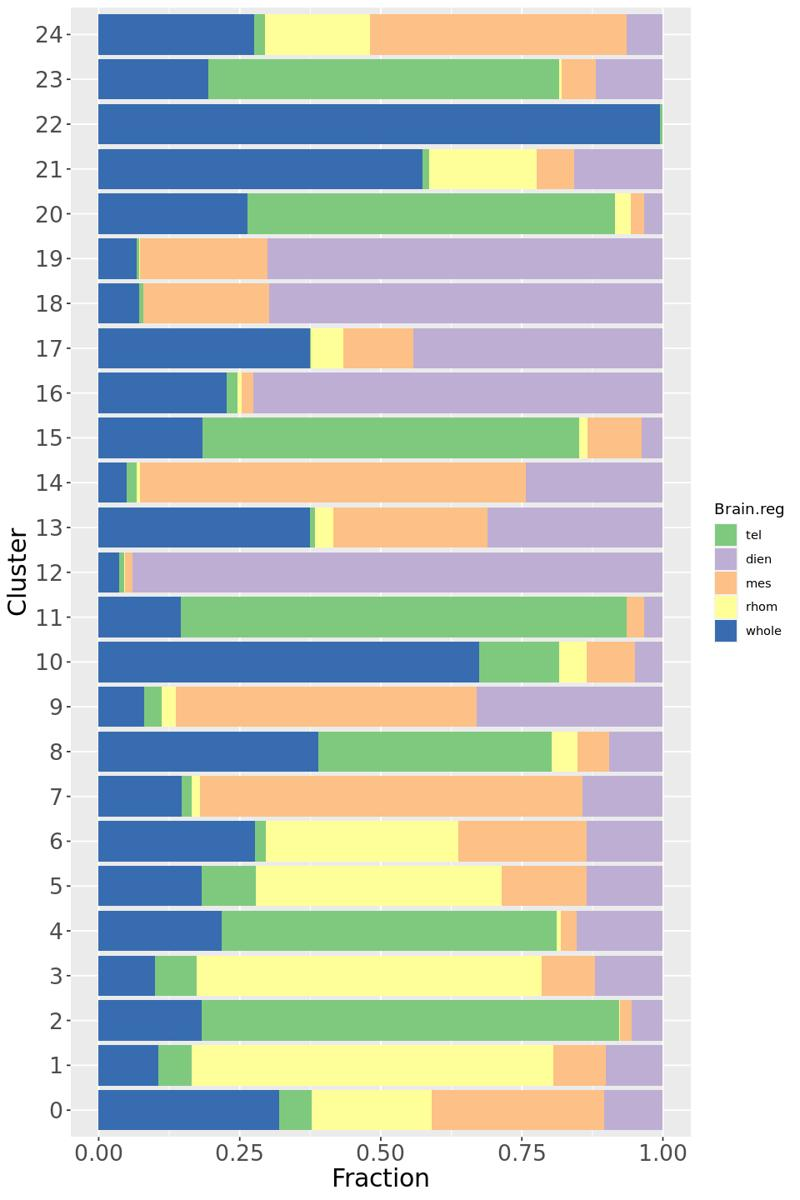

In [181]:
options(repr.plot.width=8, repr.plot.height=12)

p_br


Good point: all clusters have at least some contribution from dissected libraries + whole brain libaries - further evidence of good sample intermixing.  
However the whole brain libraries are not helpful for determining regional specificity so I will repeat calculation with them excluded.  

In [156]:
brain.reg.by.cluster <- table(neu_pool$brain_reg, neu_pool$clusters_numeric_pc30_res0.8)

In [170]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
          0    1    2    3    4    5    6    7    8    9   10   11   12   13
  dien  453  347  167  343  312  251  230  302  135  568   29   31 1421  226
  mes  1678  403   78  345   73  353  486 1818  102 1161   65   35   25  250
  rhom 1843 4372   11 3513   32 1618 1156   64  128   91   58    2    5   48
  tel   373  303 3365  316 1827  272   48   56  884   78  127 1096   20    9
      
         14   15   16   17   18   19   20   21   22   23   24
  dien  236   17  375  164  440  446   12   26    0   28    7
  mes   844   56   14   58  177  182   11   14    0   18   63
  rhom   10   14    7   43    0    1   21   63    0    2   41
  tel    26  460   15    1    7    5  358    3    1  219    3

In [173]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [174]:
brain.reg.by.cluster.diss.norm

      
                  0            1            2            3            4
  dien 0.0689917758 0.0528480049 0.0254340542 0.0522388060 0.0475175145
  mes  0.2019496931 0.0485016247 0.0093874112 0.0415212420 0.0087856541
  rhom 0.1402267367 0.3326485582 0.0008369474 0.2672905729 0.0024347561
  tel  0.0377836305 0.0306928687 0.3408630470 0.0320097245 0.1850688817
      
                  5            6            7            8            9
  dien 0.0382272312 0.0350289369 0.0459945172 0.0205604630 0.0865062443
  mes  0.0424840534 0.0584907931 0.2187988928 0.0122758455 0.1397280058
  rhom 0.1231073575 0.0879555657 0.0048695123 0.0097390246 0.0069238378
  tel  0.0275526742 0.0048622366 0.0056726094 0.0895461912 0.0079011345
      
                 10           11           12           13           14
  dien 0.0044166920 0.0047212915 0.2164179104 0.0344197380 0.0359427353
  mes  0.0078228427 0.0042122999 0.0030087857 0.0300878565 0.1015766037
  rhom 0.0044129955 0.0001521723 0.00038043

In [175]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [176]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,0,0.15367300
2,mes,0,0.44982485
3,rhom,0,0.31234250
4,tel,0,0.08415965
5,dien,1,0.11372718
6,mes,1,0.10437391


In [178]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



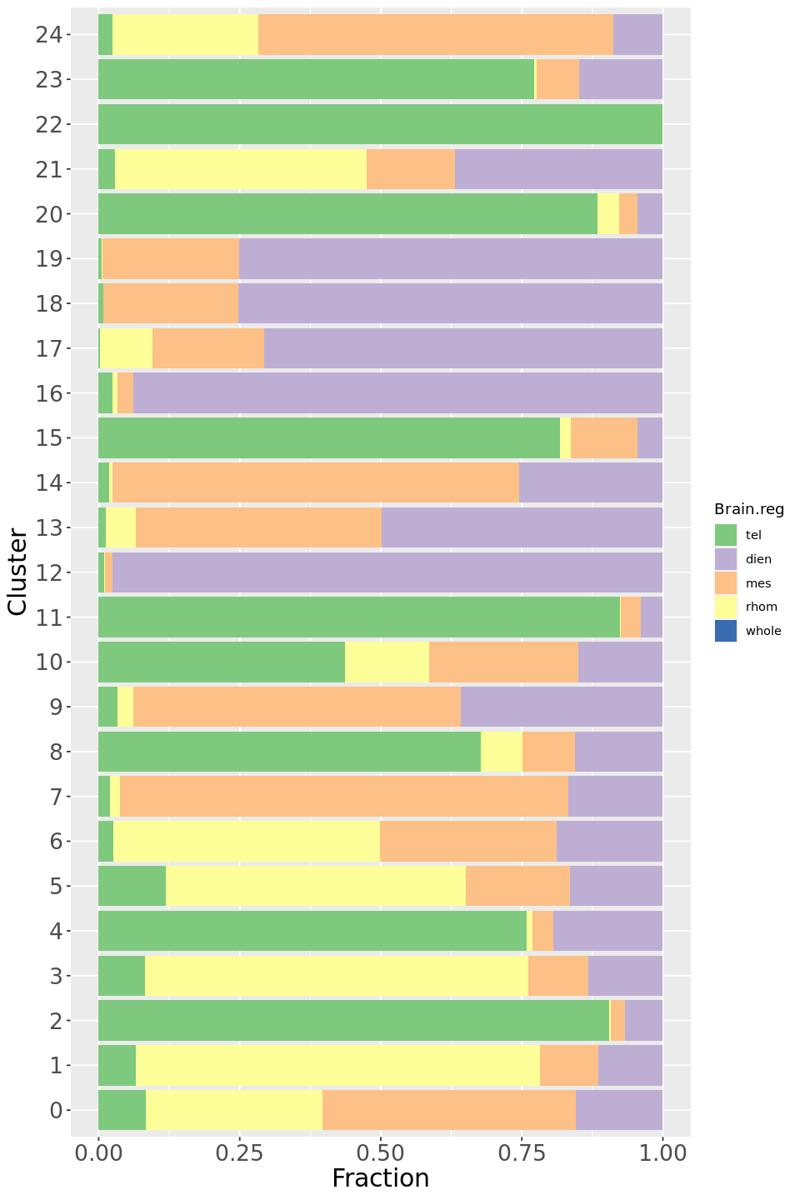

In [180]:
options(repr.plot.width=8, repr.plot.height=12)

p_br_diss


Given that I have observed previously that cluster 22 is dominated by whole brain library, it is an artefact to include it here so here's a plot without it:

In [182]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df[which(brain.reg.by.cluster.diss.df$Cluster != 22),], aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



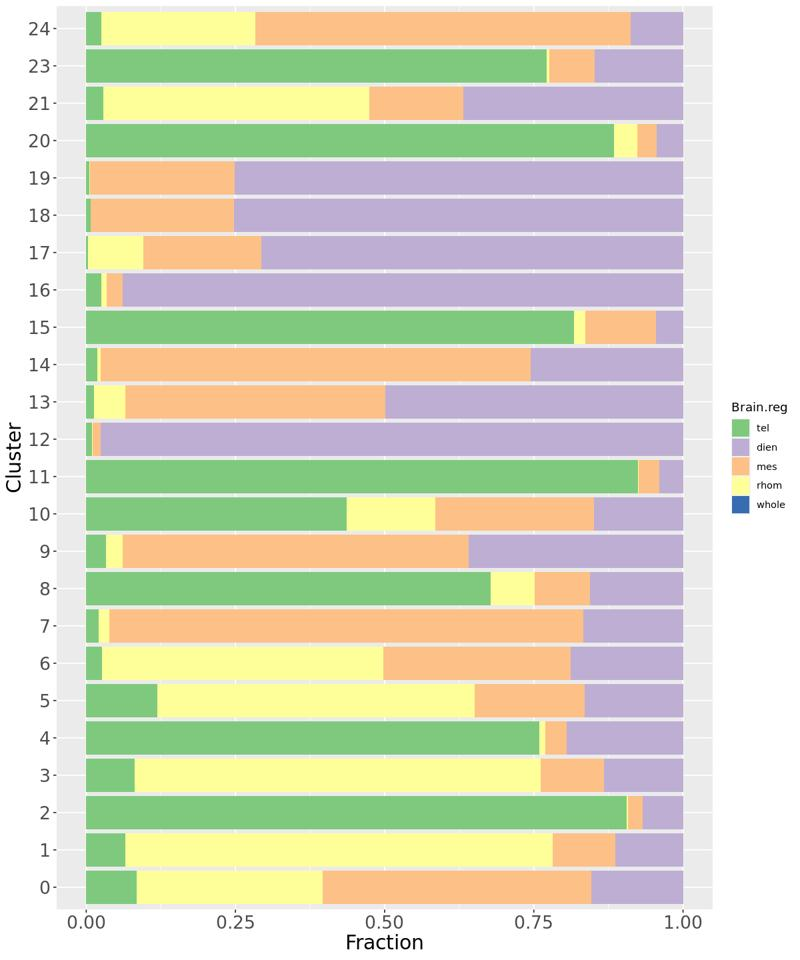

In [183]:
options(repr.plot.width=10, repr.plot.height=12)

p_br_diss


For a more quantitative overview I want to decide regional specificity based on a cutoff.  
First I plot max fraction for each cluster to get an idea of a cutoff value that would make sense (ideally aiming for around 70% to account for 10% contamination from each of the other regions + keep it consistent with what I do for RG).

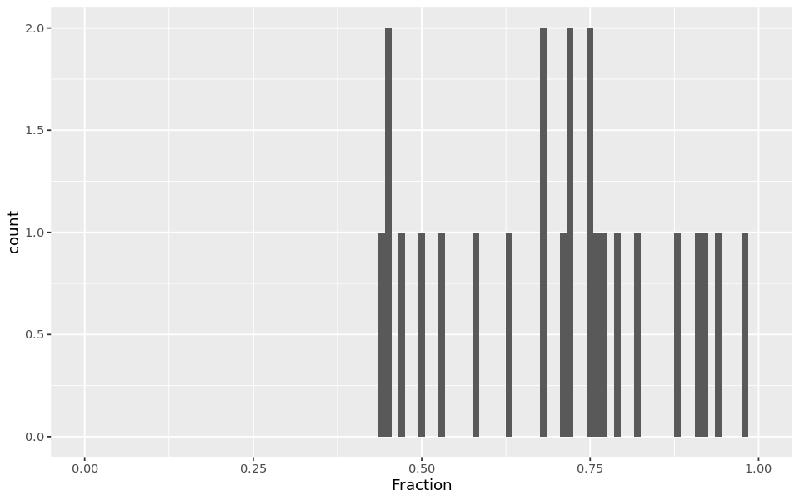

In [185]:
options(repr.plot.width=8, repr.plot.height=5)

neu.reg.spec <- aggregate(Fraction ~ Cluster, brain.reg.by.cluster.diss.df[which(brain.reg.by.cluster.diss.df$Cluster != 22),], max)
#merge with original table to find corresponding brain region (will fail if there are duplicate values)
#what's a good cutoff point? plot histogram of max fractions
neu.reg.spec <- merge(neu.reg.spec, brain.reg.by.cluster.diss.df[which(brain.reg.by.cluster.diss.df$Cluster != 22),])
ggplot(neu.reg.spec, aes(x = Fraction)) + geom_histogram(binwidth = 0.01) + coord_cartesian(xlim = c(0,1))



In [187]:
#I'll go for 0.7 for now, if I notice some issues with this I will increase to higher cutoff in the future
neu.reg.spec$Is.specific <- neu.reg.spec$Fraction > 0.7

#on the opposite side, there are some clusters with really appreciable good mixing across regions, that should certainly be called global ie those where the maximum fraction is lower that 50%
neu.reg.spec$Is.global <- neu.reg.spec$Fraction < 0.5

In [188]:
neu.reg.spec

Cluster,Fraction,Brain.reg,Is.specific,Is.global
<fct>,<dbl>,<fct>,<lgl>,<lgl>
0,0.4498249,mes,FALSE,TRUE
1,0.7158488,rhom,TRUE,FALSE
10,0.4358363,tel,FALSE,TRUE
11,0.9243526,tel,TRUE,FALSE
12,0.9755891,dien,TRUE,FALSE
13,0.4983211,dien,FALSE,TRUE
14,0.7208416,mes,TRUE,FALSE
15,0.8176188,tel,TRUE,FALSE
16,0.9385865,dien,TRUE,FALSE


### Annotate clusters

#### Step 1: reorder numeric cluster names

In [130]:
# save original numeric names
#neu_pool$pc30_res0.8_clusters_numeric <- Idents(neu_pool)



In [ ]:
# add numeric names that reflect final clustering with manual corrections
# add +1 to cluster names so they start with 1 (I prefer this for the manuscript figure)
# manually merge clusters that co-localize on UMAP and show no sufficient marker distinction
# former clusters 12 and 22 are merged with 0 and all renamed as "1"


In [54]:
neu_pool <- RenameIdents(object = neu_pool, 
                        "0" = "1",
                         "1" = "2",
                         "2" = "3",
                         "3" = "4",
                         "4" = "5",
                         "5" = "6",
                         "6" = "7",
                         "7" = "8",
                         "8" = "9",
                         "9" = "10",
                         "10" = "11",
                         "11" = "12",
                         "12" = "1",
                         "13" = "13",
                         "14" = "14",
                         "15" = "15",
                         "16" = "16",
                         "17" = "17",
                         "18" = "18",
                         "19" = "19",
                        "20" = "20",
                        "21" = "21",
                        "22" = "1",
                        "23" = "22",
                        "24" = "23" 
                        )

#stash
neu_pool[["pc30_res0.8_clusters_numeric_edited"]] <- Idents(object = neu_pool)

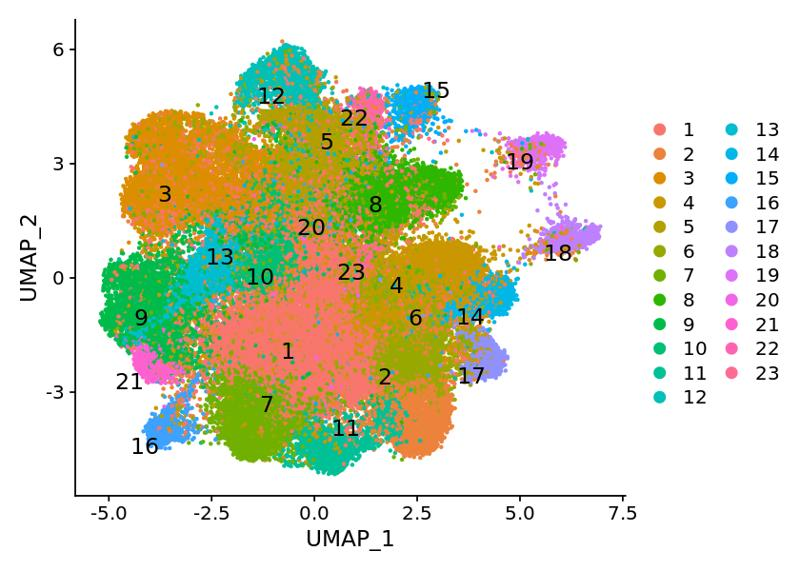

In [55]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(object = neu_pool, reduction = 'umap', label = TRUE, label.size = 5, pt.size = 0.6, repel = TRUE)

#most clusters look okay except 2 which is not centered - may benefit from further reclustering
# 20 has the same issue

#### Step 2: recalculate fraction brain region + replot markers

##### Brain region

In [28]:
brain.reg.by.cluster <- table(neu_pool$brain_reg, neu_pool$pc30_res0.8_clusters_numeric_edited)

In [29]:
brain.reg.by.cluster.diss <- brain.reg.by.cluster[c(1:4),]
brain.reg.by.cluster.diss

      
          1    2    3    4    5    6    7    8    9   10   11   12   13   14
  dien 1874  347  167  343  312  251  230  302  135  568   29   31  226  236
  mes  1703  403   78  345   73  353  486 1818  102 1161   65   35  250  844
  rhom 1848 4372   11 3513   32 1618 1156   64  128   91   58    2   48   10
  tel   394  303 3365  316 1827  272   48   56  884   78  127 1096    9   26
      
         15   16   17   18   19   20   21   22   23
  dien   17  375  164  440  446   12   26   28    7
  mes    56   14   58  177  182   11   14   18   63
  rhom   14    7   43    0    1   21   63    2   41
  tel   460   15    1    7    5  358    3  219    3

In [30]:
#margin = 1 sums across rows (how is brain reg distributed over clusters)
brain.reg.by.cluster.diss.norm <- round(prop.table(brain.reg.by.cluster.diss, margin = 1), digits = 10)
#brain.reg.by.cluster.norm <- brain.reg.by.cluster.perc1 * 100

In [31]:
brain.reg.by.cluster.diss.norm

      
                  1            2            3            4            5
  dien 0.2854096863 0.0528480049 0.0254340542 0.0522388060 0.0475175145
  mes  0.2049584788 0.0485016247 0.0093874112 0.0415212420 0.0087856541
  rhom 0.1406071673 0.3326485582 0.0008369474 0.2672905729 0.0024347561
  tel  0.0399108590 0.0306928687 0.3408630470 0.0320097245 0.1850688817
      
                  6            7            8            9           10
  dien 0.0382272312 0.0350289369 0.0459945172 0.0205604630 0.0865062443
  mes  0.0424840534 0.0584907931 0.2187988928 0.0122758455 0.1397280058
  rhom 0.1231073575 0.0879555657 0.0048695123 0.0097390246 0.0069238378
  tel  0.0275526742 0.0048622366 0.0056726094 0.0895461912 0.0079011345
      
                 11           12           13           14           15
  dien 0.0044166920 0.0047212915 0.0344197380 0.0359427353 0.0025890953
  mes  0.0078228427 0.0042122999 0.0300878565 0.1015766037 0.0067396799
  rhom 0.0044129955 0.0001521723 0.00365213

In [32]:
#margin = 2 sums across columns (which brain regs make up each cluster) - this is what I need for per cluster calculation
#use as input rowwise normalized data
brain.reg.by.cluster.diss.df <- as.data.frame(round(prop.table(brain.reg.by.cluster.diss.norm, margin = 2), digits = 10))
colnames(brain.reg.by.cluster.diss.df) <- c("Brain.reg", "Cluster", "Fraction")

In [33]:
head(brain.reg.by.cluster.diss.df)

,Brain.reg,Cluster,Fraction
,<fct>,<fct>,<dbl>
1,dien,1,0.42542191
2,mes,1,0.30550410
3,rhom,1,0.20958423
4,tel,1,0.05948976
5,dien,2,0.11372718
6,mes,2,0.10437391


In [34]:
p_br_diss <- ggplot(data = brain.reg.by.cluster.diss.df, aes(x = Cluster, y = Fraction, fill = Brain.reg)) + geom_bar(stat="identity") + 
coord_cartesian(ylim = c(0,1)) + labs(x="Cluster", y="Fraction") +  
theme(axis.title = element_text(size = 18), axis.text = element_text(size = 16),   plot.title = element_text(size = 16, hjust = 0.5))  + 
coord_flip() + scale_fill_manual(values = reg_colors)

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



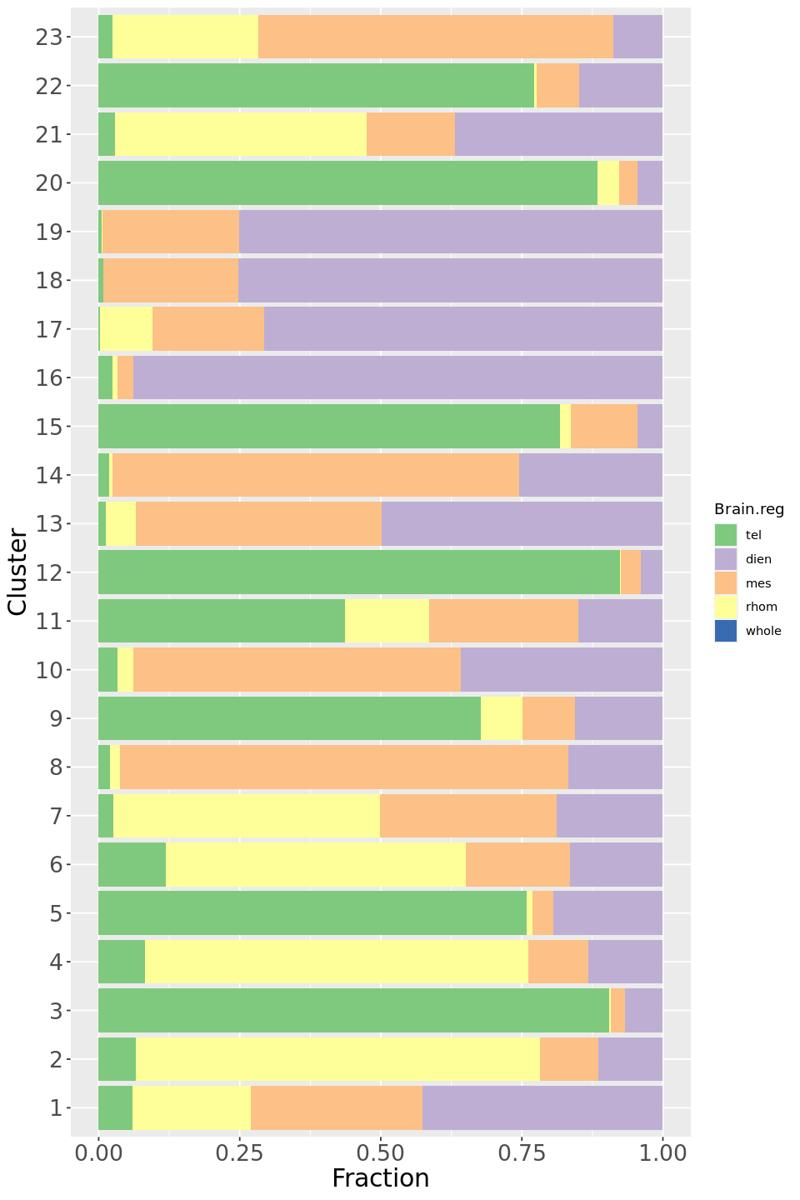

In [35]:
options(repr.plot.width=8, repr.plot.height=12)

p_br_diss

For a more quantitative overview I want to decide regional specificity based on a cutoff.  
First I plot max fraction for each cluster to get an idea of a cutoff value that would make sense (ideally aiming for around 70% to account for 10% contamination from each of the other regions + keep it consistent with what I do for RG).

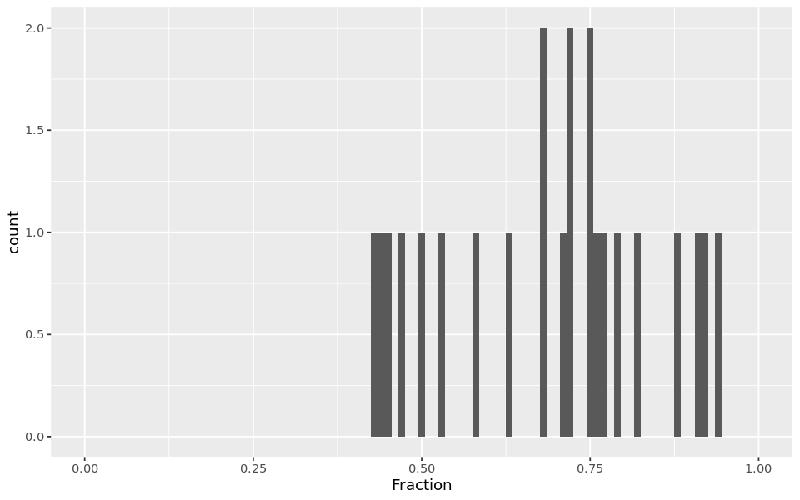

In [36]:
options(repr.plot.width=8, repr.plot.height=5)

neu.reg.spec <- aggregate(Fraction ~ Cluster, brain.reg.by.cluster.diss.df, max)
#merge with original table to find corresponding brain region (will fail if there are duplicate values)
#what's a good cutoff point? plot histogram of max fractions
neu.reg.spec <- merge(neu.reg.spec, brain.reg.by.cluster.diss.df)
ggplot(neu.reg.spec, aes(x = Fraction)) + geom_histogram(binwidth = 0.01) + coord_cartesian(xlim = c(0,1))



In [37]:
#I'll go for 0.7 for now, if I notice some issues with this I will increase to higher cutoff in the future
neu.reg.spec$Is.specific <- neu.reg.spec$Fraction > 0.7

#on the opposite side, there are some clusters with really appreciable good mixing across regions, that should certainly be called global ie those where the maximum fraction is lower that 50%
#not useful for now
#neu.reg.spec$Is.global <- neu.reg.spec$Fraction < 0.5

In [38]:
neu.reg.spec

Cluster,Fraction,Brain.reg,Is.specific
<fct>,<dbl>,<fct>,<lgl>
1,0.4254219,dien,FALSE
10,0.5796418,mes,FALSE
11,0.4358363,tel,FALSE
12,0.9243526,tel,TRUE
13,0.4983211,dien,FALSE
14,0.7208416,mes,TRUE
15,0.8176188,tel,TRUE
16,0.9385865,dien,TRUE
17,0.7069565,dien,TRUE


Newer version: for some of the downstream plotting it would be helpful to have a separate metadata entry for the fraction of each brain region per cluster. So I reformat the original table with the fractions for each cluster.  

In [39]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [40]:
brain.reg.by.cluster.df.wide <- dcast(brain.reg.by.cluster.diss.df, 
                                      Cluster ~ Brain.reg, value.var = "Fraction")
head(brain.reg.by.cluster.df.wide)

Warning message in dcast(brain.reg.by.cluster.diss.df, Cluster ~ Brain.reg, value.var = "Fraction"):
“The dcast generic in data.table has been passed a data.frame and will attempt to redirect to the reshape2::dcast; please note that reshape2 is deprecated, and this redirection is now deprecated as well. Please do this redirection yourself like reshape2::dcast(brain.reg.by.cluster.diss.df). In the next version, this warning will become an error.”


,Cluster,dien,mes,rhom,tel
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.42542191,0.30550410,0.209584232,0.05948976
2,2,0.11372718,0.10437391,0.715848850,0.06605005
3,3,0.06755008,0.02493194,0.002222841,0.90529514
4,4,0.13290276,0.10563579,0.680024266,0.08143718
5,5,0.19489823,0.03603531,0.009986416,0.75908005
6,6,0.16522027,0.18361850,0.532077007,0.11908423


In [41]:
# round to only 2 decimal places
brain.reg.by.cluster.df.wide[,-1] <-round(brain.reg.by.cluster.df.wide[,-1],2)
head(brain.reg.by.cluster.df.wide)

,Cluster,dien,mes,rhom,tel
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.43,0.31,0.21,0.06
2,2,0.11,0.10,0.72,0.07
3,3,0.07,0.02,0.00,0.91
4,4,0.13,0.11,0.68,0.08
5,5,0.19,0.04,0.01,0.76
6,6,0.17,0.18,0.53,0.12


In [42]:
brain.reg.by.cluster.df.wide$Max_fraction <- apply(brain.reg.by.cluster.df.wide[,c(2:5)], 1, max)
brain.reg.by.cluster.df.wide$Max_region <- colnames(brain.reg.by.cluster.df.wide[,c(2:5)])[max.col(brain.reg.by.cluster.df.wide[,c(2:5)], ties.method = "first")]
head(brain.reg.by.cluster.df.wide)

,Cluster,dien,mes,rhom,tel,Max_fraction,Max_region
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,0.43,0.31,0.21,0.06,0.43,dien
2,2,0.11,0.10,0.72,0.07,0.72,rhom
3,3,0.07,0.02,0.00,0.91,0.91,tel
4,4,0.13,0.11,0.68,0.08,0.68,rhom
5,5,0.19,0.04,0.01,0.76,0.76,tel
6,6,0.17,0.18,0.53,0.12,0.53,rhom


In [43]:
table(brain.reg.by.cluster.df.wide$Max_region)


dien  mes rhom  tel 
   6    4    5    8 

In [44]:
# check for NAs (present when cluster composed only of whole brain samples)
brain.reg.by.cluster.df.wide[which(is.na(brain.reg.by.cluster.df.wide$Max_region)),]

Cluster,dien,mes,rhom,tel,Max_fraction,Max_region
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


In [45]:
# rewrite NAs as "unknown"
#brain.reg.by.cluster.df.wide[which(is.na(brain.reg.by.cluster.df.wide$Max_region)),]$Max_region <- "Unknown"
#table(brain.reg.by.cluster.df.wide$Max_region)

In [46]:
# rewrite remaining NaNs as 0
#brain.reg.by.cluster.df.wide[is.na(brain.reg.by.cluster.df.wide)] <- 0

In [47]:
# add final column that combines name of region with percentage
brain.reg.by.cluster.df.wide$Region_max_fraction <- paste0(brain.reg.by.cluster.df.wide$Max_region, "_", brain.reg.by.cluster.df.wide$Max_fraction)
head(brain.reg.by.cluster.df.wide)

,Cluster,dien,mes,rhom,tel,Max_fraction,Max_region,Region_max_fraction
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,0.43,0.31,0.21,0.06,0.43,dien,dien_0.43
2,2,0.11,0.10,0.72,0.07,0.72,rhom,rhom_0.72
3,3,0.07,0.02,0.00,0.91,0.91,tel,tel_0.91
4,4,0.13,0.11,0.68,0.08,0.68,rhom,rhom_0.68
5,5,0.19,0.04,0.01,0.76,0.76,tel,tel_0.76
6,6,0.17,0.18,0.53,0.12,0.53,rhom,rhom_0.53


In [48]:
#change column names
colnames(brain.reg.by.cluster.df.wide)[2:5] <- c("Fraction_dien", "Fraction_mes", "Fraction_rhom", "Fraction_tel")
head(brain.reg.by.cluster.df.wide)

,Cluster,Fraction_dien,Fraction_mes,Fraction_rhom,Fraction_tel,Max_fraction,Max_region,Region_max_fraction
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1,0.43,0.31,0.21,0.06,0.43,dien,dien_0.43
2,2,0.11,0.10,0.72,0.07,0.72,rhom,rhom_0.72
3,3,0.07,0.02,0.00,0.91,0.91,tel,tel_0.91
4,4,0.13,0.11,0.68,0.08,0.68,rhom,rhom_0.68
5,5,0.19,0.04,0.01,0.76,0.76,tel,tel_0.76
6,6,0.17,0.18,0.53,0.12,0.53,rhom,rhom_0.53


##### Markers

Replot markers (dataset-specific + those from raj paper).

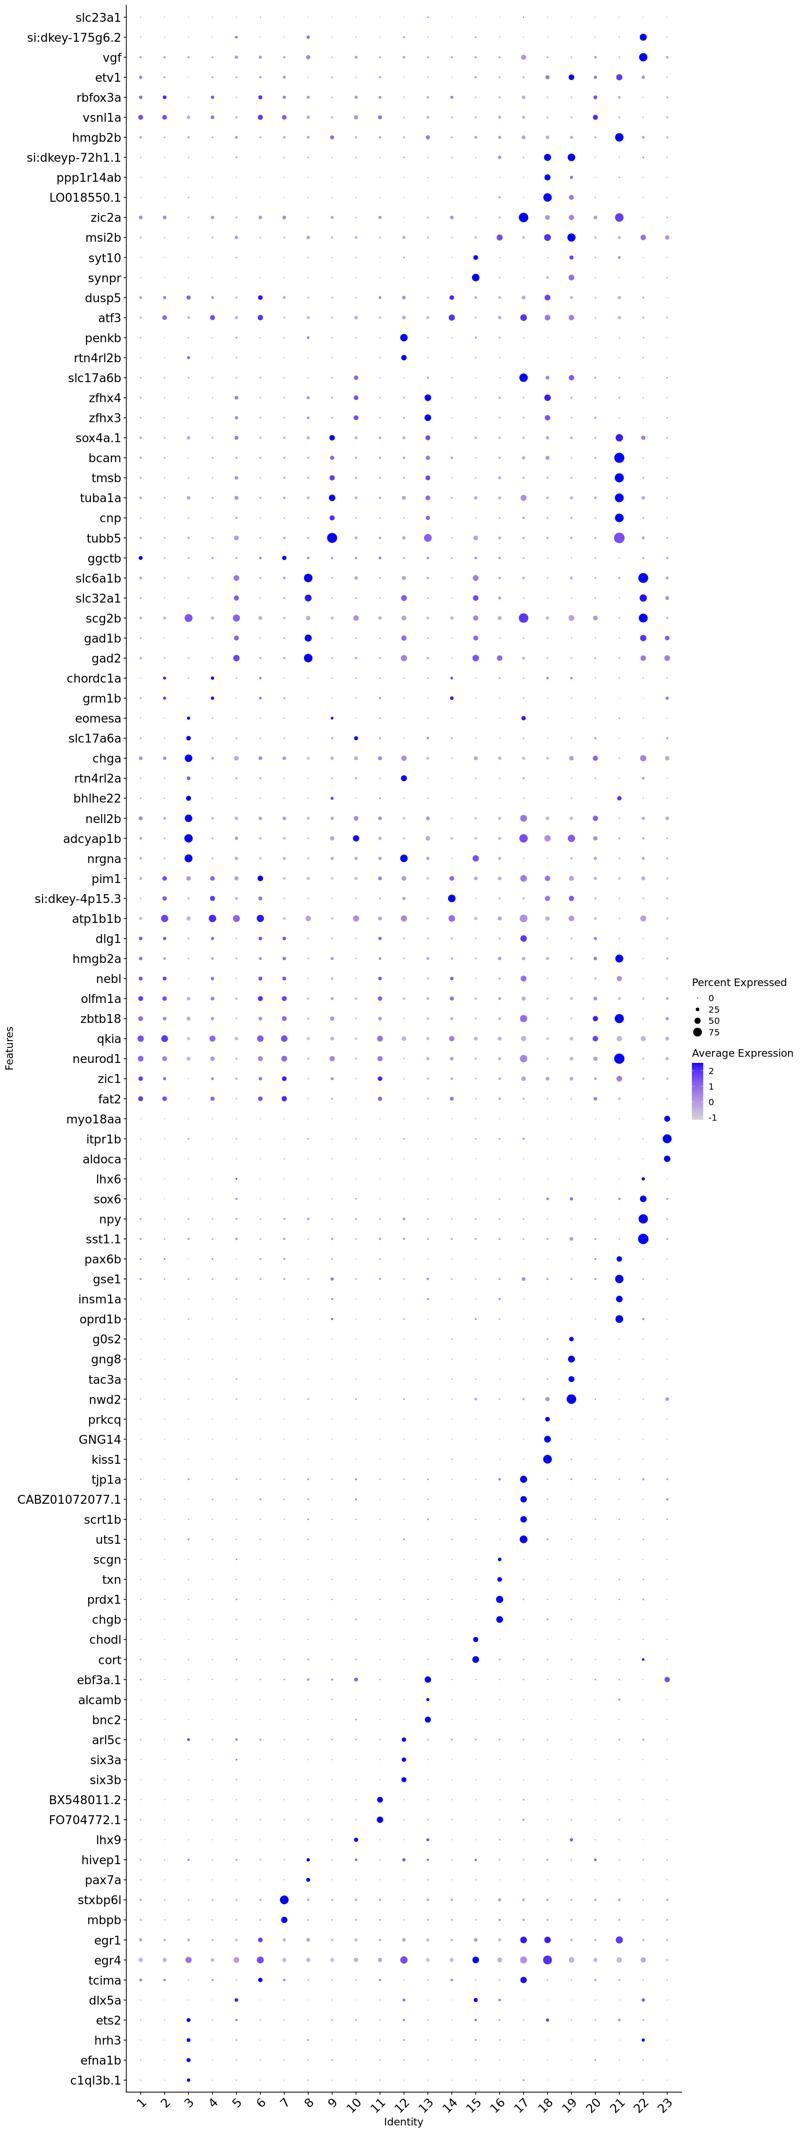

In [240]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all <- DotPlot(neu_pool, features = all_markers_vector) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_all + coord_flip()

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: eng1b, otx1b, sst3, cacng2b”


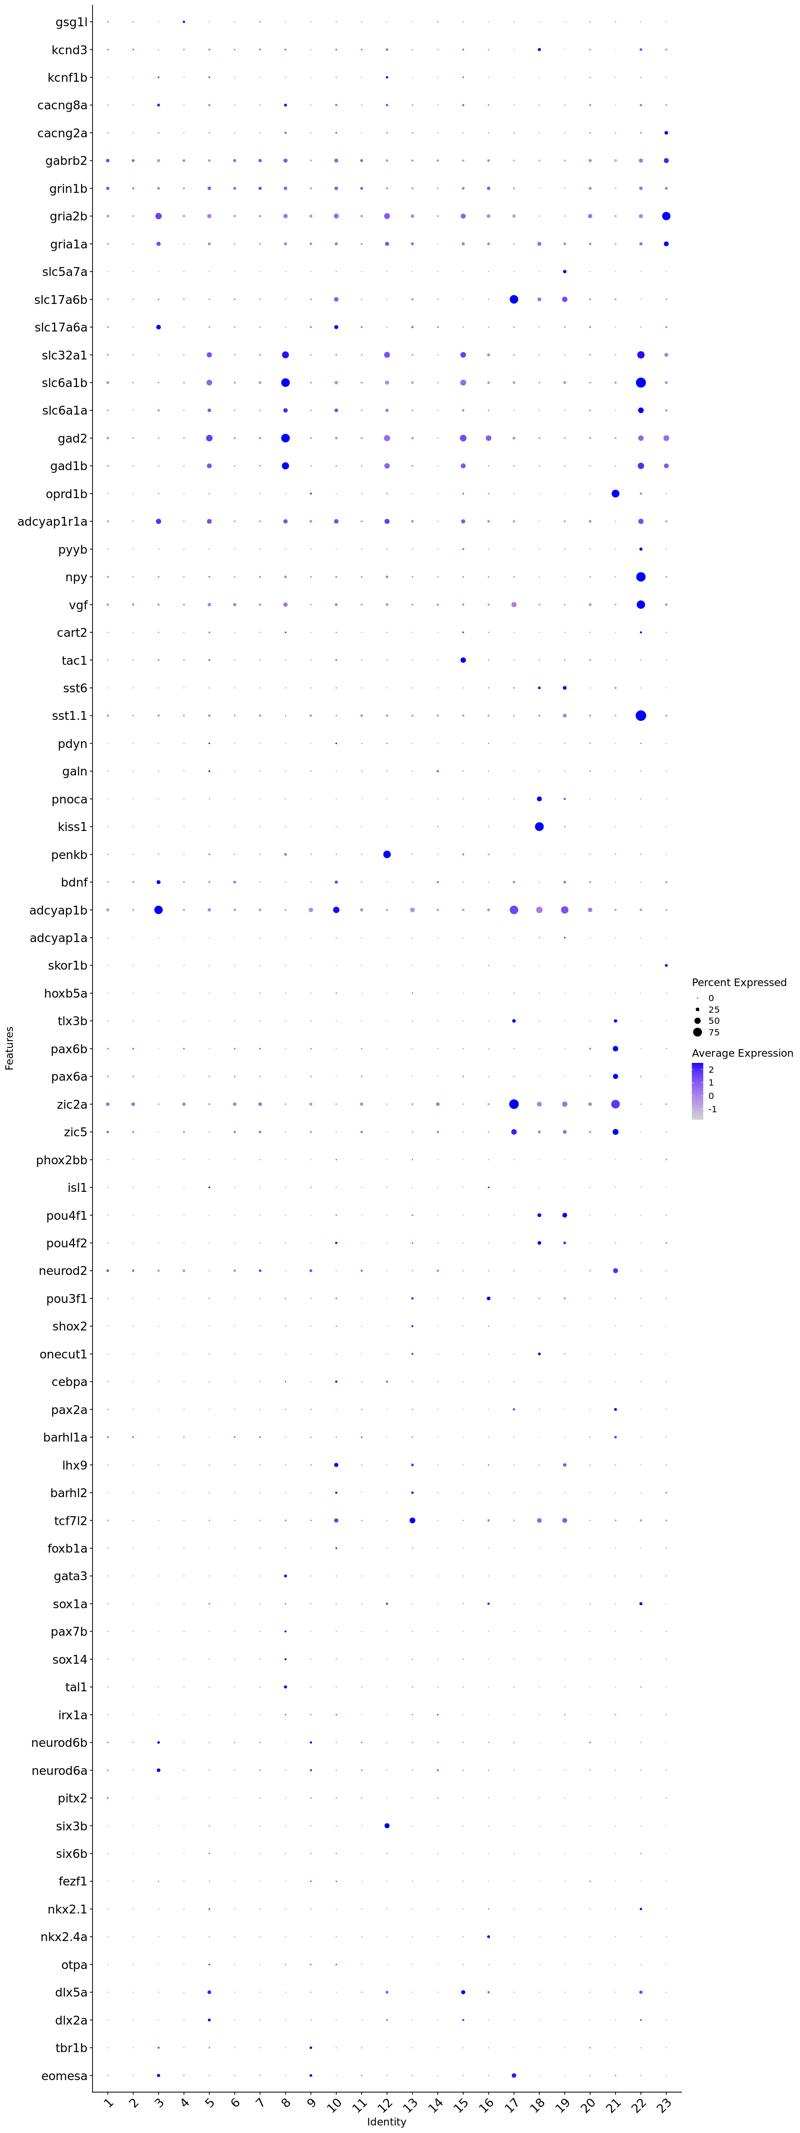

In [241]:
options(repr.plot.width=15, repr.plot.height=40)

dotplot_all_raj <- DotPlot(neu_pool, features = raj_2020_neu) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis()
dotplot_all_raj + coord_flip()

#### Step 3: assign biologically meaningful cluster names
Based on region, marker + similarity to described cell types in Raj 2020 paper.

In [4]:
# if not already load the "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$pc30_res0.8_clusters_numeric_edited

In [5]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

In [6]:
neu_pool <- RenameIdents(object = neu_pool, 
                         "1" = "Granule cells", #high zic1, fat2, neurod1 expression, but no regional specificity - seems okay because granule cells exist in multiple region
                         "2" = "Granule cells (rhom)",
                         "3" = "Neurons glutamatargic (tel)", #adcyap1r1a, slc17a6a
                         "4" = "Granule cells", #similar expr profile to 1
                         "5" = "Neurons gabaergic (tel)", #gad2, gad1b
                         "6" = "Granule cells tcima+", #similar to 1 + tcima
                         "7" = "Granule cells stxbp6l+ ", #similar to 1 + stxbp6l, howver I have some concerns about contamination for this cluster because OGD marker mbpb is also high, keep an eye
                         "8" = "Neurons gabaergic (mes)", # similar to 5 + pax7a+ expression
                         "9" = "Neurons newborn", #tubb5, tuba1a + cnp - include all these in dotPlot
                         "10" = "Neurons glutamatergic lhx9+", #adcyap1b exp + more specific lhx9
                         "11" = "Granule cells", #there are some unique markers with weird gene names
                         "12" = "Neurons gabaergic penkb+ (tel)", #some question about gabaergic state (relatively weak marker exp) but several additional strong/specific markers: penkb, nrgna, arl5c, six3a, six3b, very similar to cluster 84 from Raj 2020 15 dpf
                         "13" = "Neurons newborn bnc2+", #slightly weaker tubb5 exp than other 2 newborn clusters, has a few other specific markers
                         "14" = "Granule cells (mes)", #comparatively weak granule cell marker expr though
                         "15" = "Neurons gabaergic cort+ (tel)", #cort, chodl, tac1 + - could these be OB neurons?
                         "16" = "Neurons hypothalamus (dien)", #chgb, prdx1, txn - as cl 99 in Rad 15 dpf
                         "17" = "Granule cells tcima+ (dien)", #similar to 73 of Raj 15 dpf; also eomesa+
                         "18" = "Habenula ventral (dien)", #as Raj 41, kiss1, pnoca
                         "19" = "Habenula dorsal (dien)", #as raj 56, gng8, nwd2
                        "20" = "Neurons glutamatergic/granule cells (tel)", #mixed cluster with shared signature due to underclustering, also separates in two groups on UMAP
                        "21" = "Neurons newborn neurod1+", #also specific: oprd1b, egr1, insm1a, gse1
                        "22" = "Neurons gabaergic pax6b+ (tel)",
                        "23" = "Purkinje neurons" #itpr1b, aldoca, verify this ID
                        )

#stash
neu_pool[["pc30_res0.8_biological_names"]] <- Idents(object = neu_pool)

For easier plotting also add a shorter version of the same names.

In [12]:
# restore "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$pc30_res0.8_clusters_numeric_edited

In [13]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

In [14]:
neu_pool <- RenameIdents(object = neu_pool, 
                         "1" = "Gran cells", #high zic1, fat2, neurod1 expression, but no regional specificity - seems okay because granule cells exist in multiple region
                         "2" = "Gran cells (rhom)",
                         "3" = "Neu glut (tel)", #adcyap1r1a, slc17a6a
                         "4" = "Gran cells", #similar expr profile to 1
                         "5" = "Neu gaba (tel)", #gad2, gad1b
                         "6" = "Gran cells tcima+", #similar to 1 + tcima
                         "7" = "Gran cells stxbp6l+", #similar to 1 + stxbp6l, howver I have some concerns about contamination for this cluster because OGD marker mbpb is also high, keep an eye
                         "8" = "Neu gaba (mes)", # similar to 5 + pax7a+ expression
                         "9" = "Neu new", #tubb5, tuba1a + cnp - include all these in dotPlot
                         "10" = "Neu glut lhx9+", #adcyap1b exp + more specific lhx9
                         "11" = "Gran cells", #there are some unique markers with weird gene names
                         "12" = "Neu gaba penkb+ (tel)", #some question about gabaergic state (relatively weak marker exp) but several additional strong/specific markers: penkb, nrgna, arl5c, six3a, six3b, very similar to cluster 84 from Raj 2020 15 dpf
                         "13" = "Neu new bnc2+", #slightly weaker tubb5 exp than other 2 newborn clusters, has a few other specific markers
                         "14" = "Gran cells (mes)", #comparatively weak granule cell marker expr though
                         "15" = "Neu gaba cort+ (tel)", #cort, chodl, tac1 + - could these be OB neurons?
                         "16" = "Neu hyp (dien)", #chgb, prdx1, txn - as cl 99 in Rad 15 dpf
                         "17" = "Gran cells tcima+ (dien)", #similar to 73 of Raj 15 dpf; also eomesa+
                         "18" = "Hab vent (dien)", #as Raj 41, kiss1, pnoca
                         "19" = "Hab dors (dien)", #as raj 56, gng8, nwd2
                        "20" = "Neu glut/gran cells (tel)", #mixed cluster with shared signature due to underclustering, also separates in two groups on UMAP
                        "21" = "Neu new neurod1+", #also specific: oprd1b, egr1, insm1a, gse1
                        "22" = "Neu gaba pax6b+ (tel)",
                        "23" = "Purkinje neu" #itpr1b, aldoca, verify this ID
                        )

#stash
neu_pool[["pc30_res0.8_biological_names_short"]] <- Idents(object = neu_pool)

Finally, for the plots in the manuscript include number in front of the name to keep Fig 2 and Fig 1 linked.  

In [15]:
# restore "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$pc30_res0.8_clusters_numeric_edited

In [16]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

In [17]:
neu_pool <- RenameIdents(object = neu_pool, 
                         "1" = "1. Gran cells", #high zic1, fat2, neurod1 expression, but no regional specificity - seems okay because granule cells exist in multiple region
                         "2" = "2. Gran cells (rhom)",
                         "3" = "3. Neu glut (tel)", #adcyap1r1a, slc17a6a
                         "4" = "4. Gran cells", #similar expr profile to 1
                         "5" = "5. Neu gaba (tel)", #gad2, gad1b
                         "6" = "6. Gran cells tcima+", #similar to 1 + tcima
                         "7" = "7. Gran cells stxbp6l+", #similar to 1 + stxbp6l, howver I have some concerns about contamination for this cluster because OGD marker mbpb is also high, keep an eye
                         "8" = "8. Neu gaba (mes)", # similar to 5 + pax7a+ expression
                         "9" = "9. Neu new", #tubb5, tuba1a + cnp - include all these in dotPlot
                         "10" = "10. Neu glut lhx9+", #adcyap1b exp + more specific lhx9
                         "11" = "11. Gran cells", #there are some unique markers with weird gene names
                         "12" = "12. Neu gaba penkb+ (tel)", #some question about gabaergic state (relatively weak marker exp) but several additional strong/specific markers: penkb, nrgna, arl5c, six3a, six3b, very similar to cluster 84 from Raj 2020 15 dpf
                         "13" = "13. Neu new bnc2+", #slightly weaker tubb5 exp than other 2 newborn clusters, has a few other specific markers
                         "14" = "14. Gran cells (mes)", #comparatively weak granule cell marker expr though
                         "15" = "15. Neu gaba cort+ (tel)", #cort, chodl, tac1 + - could these be OB neurons?
                         "16" = "16. Neu hyp (dien)", #chgb, prdx1, txn - as cl 99 in Rad 15 dpf
                         "17" = "17. Gran cells tcima+ (dien)", #similar to 73 of Raj 15 dpf; also eomesa+
                         "18" = "18. Hab vent (dien)", #as Raj 41, kiss1, pnoca
                         "19" = "19. Hab dors (dien)", #as raj 56, gng8, nwd2
                        "20" = "20. Neu glut/gran cells (tel)", #mixed cluster with shared signature due to underclustering, also separates in two groups on UMAP
                        "21" = "21. Neu new neurod1+", #also specific: oprd1b, egr1, insm1a, gse1
                        "22" = "22. Neu gaba pax6b+ (tel)",
                        "23" = "23. Purkinje neu" #itpr1b, aldoca, verify this ID
                        )

#stash
neu_pool[["pc30_res0.8_biological_names_short_num"]] <- Idents(object = neu_pool)

#### Step 4: assign regional specificity as separate metadata entry

Add regional specificity as separate metadata column - region-specific and simplified version.   
Previously I only did this for radial glia but adding it for neurons as well could potentially give some further insight in scVelo trajectories.  

##### Continuous scale

Based on the calculation above, for each cluster write down maximum fraction of each brain region as well as the maximum brain region.  

In [61]:
str(neu_pool@meta.data)

'data.frame':	64582 obs. of  30 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  4597 2350 692 1291 2354 ...
 $ nFeature_RNA                       : int  1522 1038 230 652 1027 1365 964 350 584 279 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  0.247 0.375 1.616 0.234 0.456 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.9092 0.7495 0.0435 0.2527 0.4727 ...
 $ scDblFinder.weighted               : num  0.838 0.817 0.25

In [49]:
# use previously obtained data frame with region fractions per cluster
brain.reg.by.cluster.df.wide

Cluster,Fraction_dien,Fraction_mes,Fraction_rhom,Fraction_tel,Max_fraction,Max_region,Region_max_fraction
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0.43,0.31,0.21,0.06,0.43,dien,dien_0.43
2,0.11,0.10,0.72,0.07,0.72,rhom,rhom_0.72
3,0.07,0.02,0.00,0.91,0.91,tel,tel_0.91
4,0.13,0.11,0.68,0.08,0.68,rhom,rhom_0.68
5,0.19,0.04,0.01,0.76,0.76,tel,tel_0.76
6,0.17,0.18,0.53,0.12,0.53,rhom,rhom_0.53
7,0.19,0.31,0.47,0.03,0.47,rhom,rhom_0.47
8,0.17,0.79,0.02,0.02,0.79,mes,mes_0.79
9,0.16,0.09,0.07,0.68,0.68,tel,tel_0.68


In [76]:
clusters_numeric_vector <- neu_pool$pc30_res0.8_clusters_numeric_edited

In [77]:
head(clusters_numeric_vector)

B1.T_AAAGAGACGGATTC-1 B1.T_AAAGAGACTAGACC-1 B1.T_AAAGAGACTCTACT-1 
                    3                    12                     3 
B1.T_AAAGGCCTAGATCC-1 B1.T_AAATACTGGAATAG-1 B1.T_AAATCAACCTGCTC-1 
                   22                    11                     3 
Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

In [78]:
# use mapvalues to transfer the values from the table to the 
vector_fraction_dien <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Fraction_dien))
vector_fraction_mes <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Fraction_mes))
vector_fraction_rhom <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Fraction_rhom))
vector_fraction_tel <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Fraction_tel))
vector_max_fraction <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Max_fraction))
vector_max_region <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Max_region))
vector_region_max_fraction <- plyr::mapvalues(clusters_numeric_vector,
                                        from = as.vector(brain.reg.by.cluster.df.wide$Cluster),
                                        to = as.vector(brain.reg.by.cluster.df.wide$Region_max_fraction))

In [79]:
# add vectors to metadata of neu_pool
# for plotting need to convert factor to numeric via intermediate character (otherwise numeric value matches the factor level, not the factor value)
neu_pool$pc30_res0.8_fraction_dien <- as.numeric(as.character(vector_fraction_dien))
neu_pool$pc30_res0.8_fraction_mes <- as.numeric(as.character(vector_fraction_mes))
neu_pool$pc30_res0.8_fraction_rhom <- as.numeric(as.character(vector_fraction_rhom))
neu_pool$pc30_res0.8_fraction_tel <- as.numeric(as.character(vector_fraction_tel))
neu_pool$pc30_res0.8_max_fraction <- as.numeric(as.character(vector_max_fraction))
neu_pool$pc30_res0.8_max_region <- vector_max_region
neu_pool$pc30_res0.8_region_max_fraction <- vector_region_max_fraction

In [80]:
str(neu_pool@meta.data)

'data.frame':	64582 obs. of  40 variables:
 $ orig.ident                         : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                         : num  4597 2350 692 1291 2354 ...
 $ nFeature_RNA                       : int  1522 1038 230 652 1027 1365 964 350 584 279 ...
 $ multiseq.relative.1.7              : chr  NA NA NA NA ...
 $ brain_reg                          : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                           : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                           : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                         : num  0.247 0.375 1.616 0.234 0.456 ...
 $ ident                              : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class                  : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score                  : num  0.9092 0.7495 0.0435 0.2527 0.4727 ...
 $ scDblFinder.weighted               : num  0.838 0.817 0.25

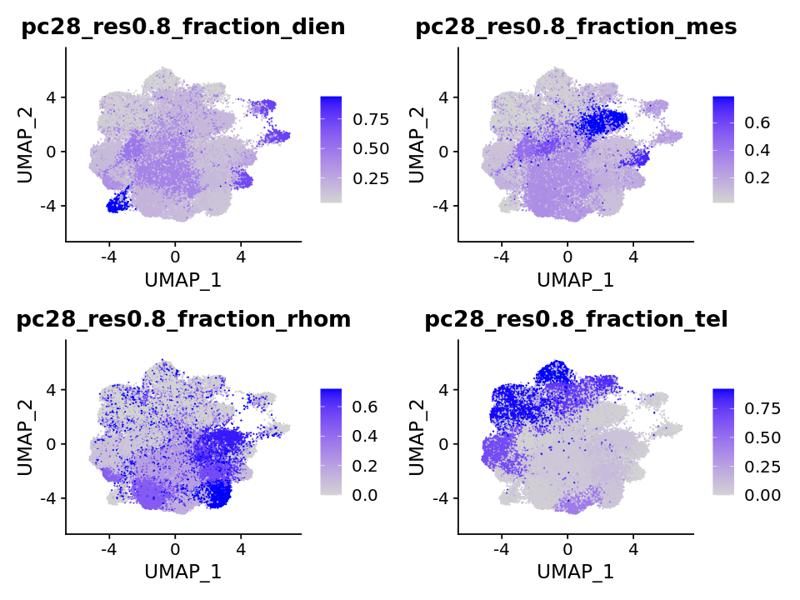

In [67]:
options(repr.plot.width=8, repr.plot.height=6)

FeaturePlot(neu_pool, features = c("pc28_res0.8_fraction_dien",
                                 "pc28_res0.8_fraction_mes",
                                 "pc28_res0.8_fraction_rhom",
                                 "pc28_res0.8_fraction_tel"), ncol = 2)

##### Discrete scale

In [4]:
# restore "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$clusters_numeric_edited_pc30_res0.8

In [5]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

In [6]:
neu_pool <- RenameIdents(object = neu_pool, 
                         "1" = "Multi", 
                         "2" = "Rhom",
                         "3" = "Tel", 
                         "4" = "Multi", 
                         "5" = "Tel", 
                         "6" = "Multi", 
                         "7" = "Multi", 
                         "8" = "Mes", 
                         "9" = "Multi", 
                         "10" = "Multi", 
                         "11" = "Multi", 
                         "12" = "Tel", 
                         "13" = "Multi", 
                         "14" = "Mes", 
                         "15" = "Tel", 
                         "16" = "Dien",
                         "17" = "Dien", 
                         "18" = "Dien", 
                         "19" = "Dien", 
                        "20" = "Tel", 
                        "21" = "Multi", 
                        "22" = "Tel",
                        "23" = "Multi"
                        )

#stash
neu_pool[["pc30_res0.8_regional_detailed"]] <- Idents(object = neu_pool)

In [7]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors_umap <- c("Tel" = "#7fc97f", #green
                "Dien" = "#beaed4", #purple
                "Mes" = "#fdc086", #orange
                "Rhom" = "#ffff99", #yellow
                "Multi" = "#386cb0", #blue
                "Unknown" = "#bababa" #grey
                )

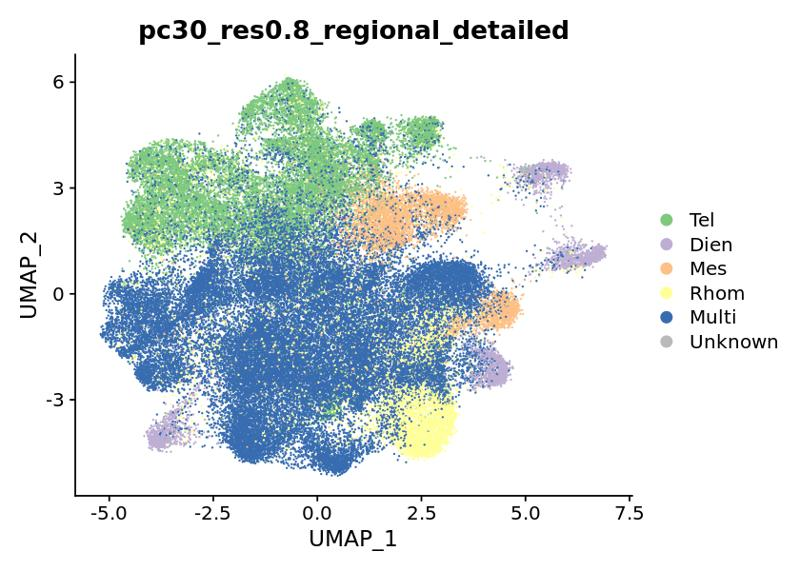

In [8]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(neu_pool, group.by = "pc30_res0.8_regional_detailed", cols = reg_colors_umap)

And also add a simpler version (just regional/global split).

In [9]:
# restore "corrected" numeric cluster names
Idents(neu_pool) <- neu_pool$clusters_numeric_edited_pc30_res0.8

In [10]:
table(neu_pool@active.ident)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
12148  6899  5863  5679  4054  3866  3832  3507  3499  2464  1909  1711  1639 
   14    15    16    17    18    19    20    21    22    23 
 1313   890   888   830   809   807   793   493   452   237 

In [11]:
neu_pool <- RenameIdents(object = neu_pool, 
                         "1" = "Global", 
                         "2" = "Regional",
                         "3" = "Regional", 
                         "4" = "Global", 
                         "5" = "Regional", 
                         "6" = "Global", 
                         "7" = "Global", 
                         "8" = "Regional", 
                         "9" = "Global", 
                         "10" = "Global", 
                         "11" = "Global", 
                         "12" = "Regional", 
                         "13" = "Global", 
                         "14" = "Regional", 
                         "15" = "Regional", 
                         "16" = "Regional",
                         "17" = "Regional", 
                         "18" = "Regional", 
                         "19" = "Regional", 
                        "20" = "Regional", 
                        "21" = "Global", 
                        "22" = "Regional",
                        "23" = "Global"
                        )

#stash
neu_pool[["pc30_res0.8_regional_simple"]] <- Idents(object = neu_pool)

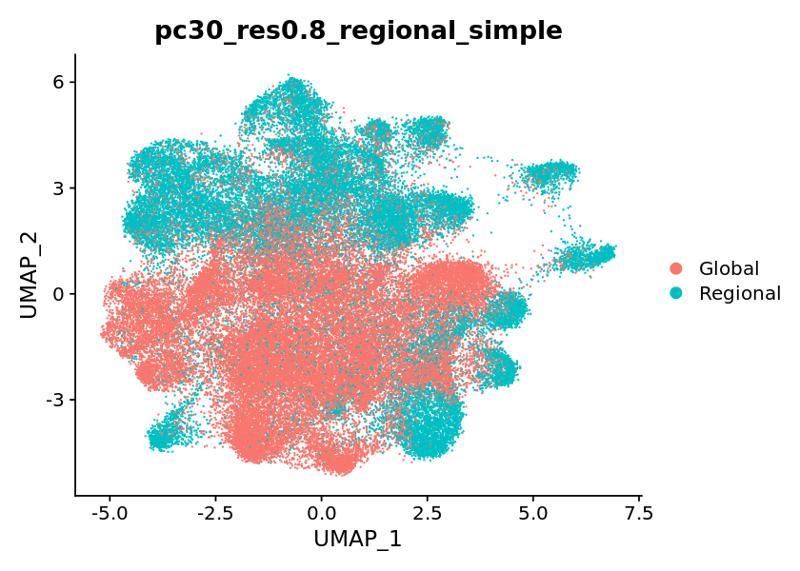

In [12]:
options(repr.plot.width=7, repr.plot.height=5)

DimPlot(neu_pool, group.by = "pc30_res0.8_regional_simple")

### Re-save object

In [34]:
# save this embedding with updated clustering and metadata labels
saveRDS(neu_pool, file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")

In [2]:
# for re-loading
neu_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/neu_pool_reg.rds")